## This notebook uses each one of the 52 prediction models trained on autoML.ipynb to generate a gaussian_kde. Applied on the validation split (half) for the supernovae from type IA.

In [50]:
%load_ext autoreload
%autoreload 2
import os 
import sys
import h2o
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
module_path = os.path.abspath(os.path.join('..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.modeling.functions_autoML import (read_models,
                                           gen_models_predictions,
                                           gen_gaussian_kde, 
                                           print_gaussian_kde,
                                           gen_df_gaussian_kde)

In [13]:
df = pd.read_pickle("../../data/structured/df.pkl")
#IA Filter
df = df.loc[df.type_bool == True]
df_smaller_half = df.sort_values("REDSHIFT_SPEC")[:int(len(df)/2)]
df_higher_half = df.sort_values("REDSHIFT_SPEC")[int(len(df)/2):]

df_smaller_half

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN20557,"[[0.0, 4870.0, 121.0], [7.972000000001572, 14800.0, 275.7], [8.980...","[[1.0, 5986.0, 122.4], [7.995999999999185, 8809.0, 164.0], [9.0109...","[[0.9879999999975553, 7148.0, 134.3], [7.980000000003201, 13050.0,...","[[5.109000000004016, 8564.0, 159.3], [8.010999999998603, 9116.0, 1...","[0.0, 0.769686868686874, 1.539373737373748, 2.309060606060622, 3.0...","([0.0, 0.7578888888889159, 1.5157777777778318, 2.273666666666748, ...","([1.0, 1.7480606060605783, 2.4961212121211567, 3.2441818181817355,...","([0.9879999999975553, 1.7360707070682735, 2.4841414141389917, 3.23...","([5.109000000004016, 5.827080808084789, 6.5451616161655615, 7.2632...","[4057.7695564773107, 7593.933715675284, 11327.431164277332, 14796....",...,1006.336537,1951.536814,1090.093779,2067.072917,-125.128986,-1530.325323,-1265.072084,Ia,True,0.04545
SN319694,"[[0.0, 0.09072, 4.786], [9.984000000004016, 0.242, 1.702], [11.976...","[[0.031000000002677552, 6.197, 5.437], [12.004000000000815, 0.5438...","[[2.139999999999418, 2.821, 3.03], [11.988000000004831, 0.622, 3.8...","[[12.031000000002678, 0.8086, 4.692], [23.00800000000163, 691.8, 1...","[0.0, 1.1313535353535435, 2.262707070707087, 3.3940606060606306, 4...","([0.0, 1.1299292929293416, 2.2598585858586833, 3.3897878787880247,...","([0.031000000002677552, 1.1617979798006626, 2.2925959595986476, 3....","([2.139999999999418, 3.248393939393355, 4.3567878787872925, 5.4651...","([12.031000000002678, 13.040828282830942, 14.050656565659207, 15.0...","[523.0034351208778, 289.33281794531683, 105.61824345070123, -0.000...",...,7033.847950,-2564.903176,-2207.641958,2385.074475,-2563.255006,-4263.644688,-4182.809857,Ia,True,0.06905
SN46940,"[[0.0, 1285.0, 24.54], [2.997000000003027, 916.6, 17.39], [4.07500...","[[0.023999999997613486, 1446.0, 27.11], [3.0429999999978463, 1551....","[[0.008000000001629815, 2148.0, 40.02], [3.004000000000815, 2031.0...","[[0.046999999998661224, 1170.0, 21.9], [3.0750000000043656, 1221.0...","[0.0, 0.5949393939393698, 1.1898787878787396, 1.7848181818181095, ...","([0.0, 0.5944242424242236, 1.1888484848484473, 1.783272727272671, ...","([0.023999999997613486, 0.6184141414117708, 1.212828282825928, 1.8...","([0.008000000001629815, 0.6024242424258535, 1.196848484850077, 1.7...","([0.046999999998661224, 0.6414646464632972, 1.235929292927933, 1.8...","[1287.464349921601, 1775.6575687702784, 2110.0974976365032, 2234.3...",...,775.972692,608.426535,-1727.714614,729.726920,-325.747033,1715.963813,-1520.018349,Ia,True,0.06939
SN222027,"[[3.9099999999962165, 3.37, 4.489], [26.050999999999476, 0.9799, 1...","[[0.0, 0.1504, 1.396], [4.042999999997846, 30.2, 13.47], [5.038999...","[[3.9219999999986612, 2.926, 3.581], [12.890999999995984, 1.848, 3...","[[4.07499999999709, 0.9201, 4.013], [5.059000000001106, 8.842, 4.8...","[0.0, 1.1706969696969456, 2.341393939393891, 3.512090909090837, 4....","([3.9099999999962165, 5.041121212117426, 6.172242424238636, 7.3033...","([0.0, 1.0496363636363337, 2.0992727272726674, 3.148909090909001, ...","([3.9219999999986612, 5.053080808079459, 6.184161616160257, 7.3152...","([4.07499999999709, 5.133707070704141, 6.192414141411192, 7.251121...","[229.79953512741898, 126.30143905904468, 46.84605197811927, 2.2829...",...,1612.955750,619.315769,-719.993271,-1762.099863,-36.961690,-44.594909,213.826137,Ia,True,0.07015
SN345661,"[[0.0, 4.151, 2.973], [8.003999999993539, 4.521, 2.687], [12.98799...","[[1.995999999999185, 8.145, 7.026], [27.16399999999703, 102.4, 6.9...","[[0.01599999999598367, 1.396, 2.428], [13.0, 0.3544, 6.048], [14.1...","[[0.030999999995401595, 5.92, 4.939], [14.179999999993015, 81.59, ...","[0.0, 1.130404040404002, 2.260808080808004, 3.391212121212006, 4.5...","([0.0, 1.130131313131256, 2.260262626262512, 3.390393939393768, 4....","([1.995999999999185, 3.1061313131304824, 4.21626262626178, 5.32639...","

In [34]:
df_higher_half.columns

Index(['desg', 'desi', 'desr', 'desz', 'Xaxis', 'desg_GP', 'desi_GP',
       'desr_GP', 'desz_GP', 'wavelets', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
       'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16',
       'f17', 'f18', 'f19', 'f20', 'type', 'type_bool', 'REDSHIFT_SPEC'],
      dtype='object')

In [7]:
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /home/fm/Projects/photometric-redshift-prediction/.photometric_redshift_prediction/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzx26qi16
  JVM stdout: /tmp/tmpzx26qi16/h2o_fm_started_from_python.out
  JVM stderr: /tmp/tmpzx26qi16/h2o_fm_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.6
H2O_cluster_version_age:,11 months and 28 days !!!
H2O_cluster_name:,H2O_from_python_fm_4si4n7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.922 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


### Creating DataFrame with predictions

In [42]:
BEST_MODEL = 'StackedEnsemble_AllModels_AutoML_20220815_153547.zip'
BEST_MODELS = {
    "StackedEnsemble": BEST_MODEL,
    "XRT": "XRT_1_AutoML_20220815_153547.zip",
    "DeepLearning": "DeepLearning_grid__1_AutoML_20220815_153547_model_1.zip",
    "DRF": "DRF_1_AutoML_20220815_153547.zip",
    "XGBoost": "XGBoost_grid__1_AutoML_20220815_153547_model_3.zip",
    "GBM": "GBM_4_AutoML_20220815_153547.zip"
}

In [14]:
df_predictions_higher_half = gen_models_predictions(df_higher_half, read_models('../../models/mojo_50_ensemble_08validation_lowerzhalf'))

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_106


Model Summary: 


,,number_of_trees
0,,38.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00011562932962159667
RMSE: 0.010753107905233568
MAE: 0.005854935769525984
RMSLE: 0.007165859276382248
Mean Residual Deviance: 0.00011562932962159667

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00508736348139562
RMSE: 0.07132575608709395
MAE: 0.0548844202412457
RMSLE: 0.0462211083161433
Mean Residual Deviance: 0.00508736348139562

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.054884482,0.0022592214,0.054756463,0.056999877,0.051460773,0.054343343,0.05686196
1,mean_residual_deviance,0.005087429,3.8471798E-4,0.0049531697,0.0055240695,0.004594672,0.004935211,0.0054300246
2,mse,0.005087429,3.8471798E-4,0.0049531697,0.0055240695,0.004594672,0.004935211,0.0054300246
3,r2,0.7821665,0.016922189,0.7901907,0.764126,0.80333203,0.7876703,0.7655134
4,residual_deviance,0.005087429,3.8471798E-4,0.0049531697,0.0055240695,0.004594672,0.004935211,0.0054300246
5,rmse,0.07128532,0.002700048,0.07037876,0.07432409,0.06778401,0.070251055,0.0736887
6,rmsle,0.046195414,0.0017319008,0.045669403,0.04822766,0.044008575,0.04540052,0.047670912



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:06,17.857 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:06,18.162 sec,5.0,0.064406,0.050832,0.004148
2,,2022-08-15 15:37:06,18.222 sec,10.0,0.042426,0.031197,0.001800
3,,2022-08-15 15:37:06,18.270 sec,15.0,0.031838,0.022141,0.001014
4,,2022-08-15 15:37:06,18.319 sec,20.0,0.024387,0.015982,0.000595
5,,2022-08-15 15:37:07,18.474 sec,25.0,0.018978,0.011792,0.000360
6,,2022-08-15 15:37:07,18.630 sec,30.0,0.015330,0.008888,0.000235
7,,2022-08-15 15:37:07,18.766 sec,35.0,0.012258,0.006895,0.000150
8,,2022-08-15 15:37:07,18.807 sec,38.0,0.010753,0.005855,0.000116



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,42.337788,1.000000,0.677776
1,f4,2.526723,0.059680,0.040450
2,f10,1.407397,0.033242,0.022531
3,f5,1.356105,0.032031,0.021710
4,f18,1.322882,0.031246,0.021178
5,f15,1.218366,0.028777,0.019505
6,f19,1.160070,0.027400,0.018571
7,f2,1.143041,0.026998,0.018299
8,f14,1.013636,0.023942,0.016227
9,f12,0.977017,0.023077,0.015641



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_107


Model Summary: 


,,number_of_trees
0,,34.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00013594676448977687
RMSE: 0.01165962111261669
MAE: 0.008093097748523962
RMSLE: 0.00757238185835726
Mean Residual Deviance: 0.00013594676448977687

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.005155120920512034
RMSE: 0.07179917075086616
MAE: 0.05524941822715206
RMSLE: 0.04658884541501164
Mean Residual Deviance: 0.005155120920512034

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.055250105,0.0018843333,0.053853743,0.056977734,0.052694887,0.056726906,0.055997252
1,mean_residual_deviance,0.0051552965,3.8110092E-4,0.004797712,0.00534627,0.0047307853,0.005626487,0.0052752285
2,mse,0.0051552965,3.8110092E-4,0.004797712,0.00534627,0.0047307853,0.005626487,0.0052752285
3,r2,0.77922535,0.017331049,0.79677564,0.7717179,0.7975059,0.7579292,0.772198
4,residual_deviance,0.0051552965,3.8110092E-4,0.004797712,0.00534627,0.0047307853,0.005626487,0.0052752285
5,rmse,0.07176102,0.0026581713,0.069265515,0.07311819,0.068780705,0.07500991,0.07263077
6,rmsle,0.046565983,0.001659576,0.044949982,0.04761589,0.04477015,0.048549645,0.04694425



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:35:51,4.545 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:35:52,4.783 sec,5.0,0.058678,0.047105,0.003443
2,,2022-08-15 15:35:52,4.812 sec,10.0,0.039432,0.029661,0.001555
3,,2022-08-15 15:35:52,4.857 sec,15.0,0.029661,0.021526,0.000880
4,,2022-08-15 15:35:52,4.888 sec,20.0,0.022695,0.016192,0.000515
5,,2022-08-15 15:35:52,4.934 sec,25.0,0.017964,0.012799,0.000323
6,,2022-08-15 15:35:52,4.957 sec,30.0,0.013959,0.009789,0.000195
7,,2022-08-15 15:35:52,4.990 sec,34.0,0.011660,0.008093,0.000136



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,31.917627,1.000000,0.500319
1,f3,6.821026,0.213707,0.106922
2,f8,3.635048,0.113888,0.056981
3,f4,2.040917,0.063943,0.031992
4,f10,1.931834,0.060526,0.030282
5,f11,1.697632,0.053188,0.026611
6,f18,1.582506,0.049581,0.024806
7,f20,1.399170,0.043837,0.021932
8,f12,1.352982,0.042390,0.021208
9,f17,1.351842,0.042354,0.021191



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_108


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 2,201 weights/biases, 31.7 KB, 916,200 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,20.0,,,,,,,,,
1,,2,100,RectifierDropout,0.0,0.0,0.0,0.000895,0.002406,0.0,0.0007,0.19716,0.294229,0.268017
2,,3,1,Linear,,0.0,0.0,0.000158,0.000055,0.0,0.01122,0.29774,-0.418509,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.01268149284929214
RMSE: 0.1126121345561487
MAE: 0.09271938248185337
RMSLE: 0.07319199950856707
Mean Residual Deviance: 0.01268149284929214

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.012825300704316258
RMSE: 0.11324884416326843
MAE: 0.08349116570558072
RMSLE: NaN
Mean Residual Deviance: 0.012825300704316258

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.08348465,0.014425928,0.096750274,0.09993997,0.07360891,0.08031589,0.0668082
1,mean_residual_deviance,0.012824941,0.0041594524,0.013556281,0.015042026,0.018125921,0.009602221,0.0077982587
2,mse,0.012824941,0.0041594524,0.013556281,0.015042026,0.018125921,0.009602221,0.0077982587
3,r2,0.45155254,0.1762882,0.42577496,0.3577158,0.22414732,0.5868795,0.6632452
4,residual_deviance,0.012824941,0.0041594524,0.013556281,0.015042026,0.018125921,0.009602221,0.0077982587
5,rmse,0.11200172,0.01872687,0.116431445,0.12264594,0.13463254,0.09799092,0.08830775
6,rmsle,0.078965954,0.011661157,0.0797951,0.094191566,NaN,0.0757637,0.06611346



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:43:20,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:43:21,5 min 22.232 sec,46378 obs/sec,10.0,1,20360.0,0.145566,0.021190,0.100269,0.092847
2,,2022-08-15 15:43:26,5 min 27.357 sec,47621 obs/sec,130.0,13,264680.0,0.082585,0.006820,0.064235,0.708015
3,,2022-08-15 15:43:31,5 min 32.590 sec,49087 obs/sec,260.0,26,529360.0,0.143865,0.020697,0.122798,0.113924
4,,2022-08-15 15:43:36,5 min 37.692 sec,50005 obs/sec,390.0,39,794040.0,0.110104,0.012123,0.085777,0.481006
5,,2022-08-15 15:43:39,5 min 40.066 sec,50210 obs/sec,450.0,45,916200.0,0.112612,0.012681,0.092719,0.457089



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f10,1.000000,1.000000,0.062802
1,f8,0.948356,0.948356,0.059559
2,f4,0.925589,0.925589,0.058129
3,f2,0.915911,0.915911,0.057521
4,f11,0.883635,0.883635,0.055494
5,f9,0.880809,0.880809,0.055317
6,f1,0.874310,0.874310,0.054909
7,f3,0.864979,0.864979,0.054323
8,f16,0.835700,0.835700,0.052484
9,f5,0.822104,0.822104,0.051630



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_109


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 12,301 weights/biases, 151.8 KB, 1,221,600 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,15.0,,,,,,,,,
1,,2,100,RectifierDropout,50.0,0.0,0.0,0.00129,0.001538,0.0,0.007711,0.289973,-0.21644,0.215397
2,,3,100,RectifierDropout,50.0,0.0,0.0,0.017977,0.031633,0.0,-0.108187,0.186985,0.02564,0.219095
3,,4,1,Linear,,0.0,0.0,0.010856,0.012758,0.0,0.20917,0.393887,0.023226,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.020281907765144706
RMSE: 0.14241456303743907
MAE: 0.11579085047655235
RMSLE: 0.094399023902882
Mean Residual Deviance: 0.020281907765144706

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.01211173910387442
RMSE: 0.11005334662732624
MAE: 0.09131795513176291
RMSLE: 0.07336710433301274
Mean Residual Deviance: 0.01211173910387442

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.09131731,0.009709637,0.09262232,0.09564346,0.09857901,0.095379084,0.07436269
1,mean_residual_deviance,0.012111881,0.0019897681,0.011823714,0.013258644,0.013353785,0.01337358,0.008749681
2,mse,0.012111881,0.0019897681,0.011823714,0.013258644,0.013353785,0.01337358,0.008749681
3,r2,0.48164454,0.08429051,0.49916407,0.43386492,0.42841142,0.4246227,0.6221596
4,residual_deviance,0.012111881,0.0019897681,0.011823714,0.013258644,0.013353785,0.01337358,0.008749681
5,rmse,0.10972512,0.009505211,0.1087369,0.11514619,0.11555858,0.115644194,0.09353973
6,rmsle,0.07320648,0.005430938,0.0726337,0.07685935,0.077870175,0.07446175,0.06420742



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:53:49,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:53:50,7 min 52.395 sec,25513 obs/sec,10.0,1,20360.0,0.084070,0.007068,0.069728,0.697417
2,,2022-08-15 15:53:55,7 min 57.439 sec,45469 obs/sec,130.0,13,264680.0,0.134414,0.018067,0.112699,0.226522
3,,2022-08-15 15:54:00,8 min 2.584 sec,52081 obs/sec,280.0,28,570080.0,0.169292,0.028660,0.143484,-0.226963
4,,2022-08-15 15:54:05,8 min 7.675 sec,55934 obs/sec,440.0,44,895840.0,0.135362,0.018323,0.107769,0.215577
5,,2022-08-15 15:54:10,8 min 12.572 sec,58472 obs/sec,600.0,60,1221600.0,0.142415,0.020282,0.115791,0.131706



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f3,1.000000,1.000000,0.083841
1,f2,0.997101,0.997101,0.083598
2,f4,0.899479,0.899479,0.075414
3,f1,0.870037,0.870037,0.072945
4,f8,0.741050,0.741050,0.062131
5,f5,0.685302,0.685302,0.057457
6,f10,0.663333,0.663333,0.055615
7,f18,0.581538,0.581538,0.048757
8,f6,0.542915,0.542915,0.045519
9,f16,0.508895,0.508895,0.042666



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_110


Model Summary: 


,,number_of_trees
0,,41.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0019579515077890824
RMSE: 0.04424874583295082
MAE: 0.03417480995143034
RMSLE: 0.029178283467386094
Mean Residual Deviance: 0.0019579515077890824

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004942313899868124
RMSE: 0.07030159244190791
MAE: 0.055079078837892516
RMSLE: 0.04593749214271319
Mean Residual Deviance: 0.004942313899868124

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05507877,0.0016885623,0.05570273,0.056796458,0.052434266,0.05451399,0.055946417
1,mean_residual_deviance,0.0049423245,2.4427217E-4,0.004920556,0.005171531,0.0045995414,0.0048382324,0.0051817624
2,mse,0.0049423245,2.4427217E-4,0.004920556,0.005171531,0.0045995414,0.0048382324,0.0051817624
3,r2,0.78839034,0.010859655,0.79157215,0.77917916,0.8031236,0.79184264,0.7762342
4,residual_deviance,0.0049423245,2.4427217E-4,0.004920556,0.005171531,0.0045995414,0.0048382324,0.0051817624
5,rmse,0.07028436,0.0017439089,0.07014667,0.071913354,0.067819916,0.069557406,0.07198446
6,rmsle,0.045926582,0.0011196034,0.045928665,0.04705267,0.044423066,0.04527313,0.046955373



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:11,22.359 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:11,22.394 sec,5.0,0.071812,0.058332,0.005157
2,,2022-08-15 15:37:11,22.432 sec,10.0,0.060667,0.047748,0.003680
3,,2022-08-15 15:37:11,22.461 sec,15.0,0.055757,0.043246,0.003109
4,,2022-08-15 15:37:11,22.637 sec,20.0,0.051948,0.040230,0.002699
5,,2022-08-15 15:37:11,22.668 sec,25.0,0.049810,0.038517,0.002481
6,,2022-08-15 15:37:11,22.712 sec,30.0,0.047852,0.037048,0.002290
7,,2022-08-15 15:37:11,22.742 sec,35.0,0.046052,0.035574,0.002121
8,,2022-08-15 15:37:11,22.770 sec,40.0,0.044669,0.034462,0.001995
9,,2022-08-15 15:37:11,22.785 sec,41.0,0.044249,0.034175,0.001958



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,40.905899,1.000000,0.791300
1,f4,1.431782,0.035002,0.027697
2,f10,1.380300,0.033743,0.026701
3,f3,0.803728,0.019648,0.015548
4,f15,0.702808,0.017181,0.013595
5,f20,0.690131,0.016871,0.013350
6,f11,0.647850,0.015838,0.012532
7,f5,0.577956,0.014129,0.011180
8,f18,0.565560,0.013826,0.010940
9,f13,0.505854,0.012366,0.009785



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_111


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,52.0,52.0,330813.0,13.0,13.0,13.0,214.0,681.0,502.44232




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00027616662351999475
RMSE: 0.016618261747848202
MAE: 0.01196161266379717
RMSLE: 0.010414637619085473
Mean Residual Deviance: 0.00027616662351999475

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00470366584604532
RMSE: 0.06858327672286678
MAE: 0.05328015573015971
RMSLE: 0.044681236662620374
Mean Residual Deviance: 0.00470366584604532

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.053280465,0.0021926428,0.05264874,0.054536223,0.049707264,0.055017862,0.054492243
1,mean_residual_deviance,0.004703758,3.1100455E-4,0.0045160456,0.004730456,0.004288654,0.004912198,0.005071437
2,mse,0.004703758,3.1100455E-4,0.0045160456,0.004730456,0.004288654,0.004912198,0.005071437
3,r2,0.79856175,0.014396398,0.80870664,0.79801273,0.8164307,0.7886604,0.78099847
4,residual_deviance,0.004703758,3.1100455E-4,0.0045160456,0.004730456,0.004288654,0.004912198,0.005071437
5,rmse,0.06855375,0.0022752485,0.06720153,0.06877831,0.06548782,0.070087075,0.07121402
6,rmsle,0.044667974,0.0012355514,0.043845724,0.04494084,0.043054145,0.045295928,0.046203233



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:53,16.917 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:53,16.958 sec,5.0,0.102193,0.084903,0.010443
2,,2022-08-15 15:37:53,16.993 sec,10.0,0.072738,0.060648,0.005291
3,,2022-08-15 15:37:53,17.034 sec,15.0,0.053769,0.044615,0.002891
4,,2022-08-15 15:37:53,17.077 sec,20.0,0.043205,0.035381,0.001867
5,,2022-08-15 15:37:53,17.112 sec,25.0,0.036149,0.028709,0.001307
6,,2022-08-15 15:37:53,17.144 sec,30.0,0.032008,0.024715,0.001025
7,,2022-08-15 15:37:53,17.180 sec,35.0,0.027932,0.021102,0.000780
8,,2022-08-15 15:37:54,17.227 sec,40.0,0.024182,0.017957,0.000585
9,,2022-08-15 15:37:54,17.269 sec,45.0,0.020875,0.015277,0.000436



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,51.357471,1.000000,0.273610
1,f2,15.866540,0.308943,0.084530
2,f4,14.921459,0.290541,0.079495
3,f5,13.860479,0.269882,0.073842
4,f14,12.284193,0.239190,0.065445
5,f10,10.372358,0.201964,0.055259
6,f8,8.334953,0.162293,0.044405
7,f3,7.639441,0.148750,0.040700
8,f9,7.621598,0.148403,0.040604
9,f7,7.239712,0.140967,0.038570



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_112


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,56.0,56.0,60765.0,10.0,10.0,10.0,54.0,112.0,81.73214




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0009418946683953554
RMSE: 0.030690302513910733
MAE: 0.02287316008531333
RMSLE: 0.019704237826807268
Mean Residual Deviance: 0.0009418946683953554

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004279009765806044
RMSE: 0.06541414041173395
MAE: 0.05070519669510476
RMSLE: 0.04243424167992636
Mean Residual Deviance: 0.004279009765806044

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05070606,0.0017969002,0.048948824,0.051967178,0.048627317,0.052541662,0.051445317
1,mean_residual_deviance,0.0042791474,2.4377723E-4,0.003999387,0.0044930605,0.0040282425,0.0044206996,0.004454346
2,mse,0.0042791474,2.4377723E-4,0.003999387,0.0044930605,0.0040282425,0.0044206996,0.004454346
3,r2,0.81675416,0.011334412,0.83059156,0.8081494,0.8275772,0.80980635,0.80764645
4,residual_deviance,0.0042791474,2.4377723E-4,0.003999387,0.0044930605,0.0040282425,0.0044206996,0.004454346
5,rmse,0.06539373,0.0018730726,0.06324071,0.067030296,0.06346844,0.06648834,0.066740885
6,rmsle,0.042422354,0.0011557057,0.040973425,0.043574113,0.041407242,0.042966273,0.04319072



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:24,5.686 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:36:24,5.835 sec,5.0,0.102420,0.085184,0.010490
2,,2022-08-15 15:36:24,5.956 sec,10.0,0.075109,0.062289,0.005641
3,,2022-08-15 15:36:24,6.071 sec,15.0,0.059692,0.048989,0.003563
4,,2022-08-15 15:36:24,6.178 sec,20.0,0.051354,0.041146,0.002637
5,,2022-08-15 15:36:24,6.284 sec,25.0,0.046864,0.036700,0.002196
6,,2022-08-15 15:36:24,6.425 sec,30.0,0.043397,0.033374,0.001883
7,,2022-08-15 15:36:25,6.539 sec,35.0,0.040147,0.030574,0.001612
8,,2022-08-15 15:36:25,6.695 sec,40.0,0.037749,0.028468,0.001425
9,,2022-08-15 15:36:25,6.817 sec,45.0,0.035037,0.026280,0.001228



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,102.234489,1.000000,0.463186
1,f5,42.662640,0.417302,0.193288
2,f3,11.408101,0.111588,0.051686
3,f10,10.378418,0.101516,0.047021
4,f4,8.367633,0.081847,0.037911
5,f8,7.064353,0.069100,0.032006
6,f2,4.593261,0.044929,0.020810
7,f15,3.439765,0.033646,0.015584
8,f18,3.114000,0.030459,0.014108
9,f17,2.868356,0.028057,0.012995



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_113


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,53.0,53.0,174444.0,17.0,17.0,17.0,180.0,324.0,257.43396




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0002136147591255468
RMSE: 0.014615565645076718
MAE: 0.010483586569710072
RMSLE: 0.009443966701994802
Mean Residual Deviance: 0.0002136147591255468

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00460444071978778
RMSE: 0.0678560293547138
MAE: 0.05278763210186467
RMSLE: 0.04416925421792057
Mean Residual Deviance: 0.00460444071978778

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05278863,0.001247573,0.05075994,0.053089913,0.052902237,0.054188963,0.053002093
1,mean_residual_deviance,0.0046047163,3.3926126E-4,0.0040440597,0.0046148114,0.0046152635,0.0048790197,0.004870426
2,mse,0.0046047163,3.3926126E-4,0.0040440597,0.0046148114,0.0046152635,0.0048790197,0.004870426
3,r2,0.8027734,0.015848352,0.8286993,0.8029507,0.8024506,0.7900878,0.78967875
4,residual_deviance,0.0046047163,3.3926126E-4,0.0040440597,0.0046148114,0.0046152635,0.0048790197,0.004870426
5,rmse,0.06781989,0.0025440997,0.06359292,0.067932405,0.067935735,0.069849975,0.06978843
6,rmsle,0.04415203,0.0014250968,0.041721884,0.04420591,0.044476595,0.045127675,0.04522807



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:48,11.375 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:48,11.416 sec,5.0,0.101139,0.083913,0.010229
2,,2022-08-15 15:37:48,11.449 sec,10.0,0.069775,0.057916,0.004869
3,,2022-08-15 15:37:48,11.482 sec,15.0,0.051095,0.042204,0.002611
4,,2022-08-15 15:37:48,11.515 sec,20.0,0.040799,0.033104,0.001665
5,,2022-08-15 15:37:48,11.553 sec,25.0,0.033110,0.026275,0.001096
6,,2022-08-15 15:37:48,11.589 sec,30.0,0.028627,0.022085,0.000820
7,,2022-08-15 15:37:48,11.624 sec,35.0,0.024219,0.018281,0.000587
8,,2022-08-15 15:37:48,11.657 sec,40.0,0.020855,0.015404,0.000435
9,,2022-08-15 15:37:48,11.693 sec,45.0,0.017690,0.012907,0.000313



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f10,40.880142,1.000000,0.164830
1,f1,33.159996,0.811152,0.133702
2,f2,23.846918,0.583337,0.096152
3,f12,20.787016,0.508487,0.083814
4,f8,19.211750,0.469953,0.077462
5,f11,12.661665,0.309727,0.051052
6,f9,11.314151,0.276764,0.045619
7,f7,11.313135,0.276739,0.045615
8,f4,10.105549,0.247199,0.040746
9,f5,8.525352,0.208545,0.034374



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_114


Model Summary: 


,,number_of_trees
0,,66.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0024711115172348862
RMSE: 0.04971027577106052
MAE: 0.03860484270565578
RMSLE: 0.032948943106113064
Mean Residual Deviance: 0.0024711115172348862

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004914233476314289
RMSE: 0.07010159396414813
MAE: 0.05504819237552071
RMSLE: 0.04604420472097021
Mean Residual Deviance: 0.004914233476314289

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05504853,0.0018332478,0.054363757,0.057959225,0.05310985,0.05549753,0.05431228
1,mean_residual_deviance,0.0049143634,3.2535908E-4,0.004649577,0.005469743,0.00472239,0.004825311,0.004904797
2,mse,0.0049143634,3.2535908E-4,0.004649577,0.005469743,0.00472239,0.004825311,0.004904797
3,r2,0.7895909,0.014099264,0.80305046,0.7664457,0.7978652,0.7923986,0.7881945
4,residual_deviance,0.0049143634,3.2535908E-4,0.004649577,0.005469743,0.00472239,0.004825311,0.004904797
5,rmse,0.07007278,0.0022829983,0.06818781,0.07395771,0.06871965,0.06946446,0.07003426
6,rmsle,0.046021767,0.0016286699,0.044779025,0.048866168,0.04526334,0.04545096,0.04574935



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:17,29.132 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:17,29.157 sec,5.0,0.088860,0.071282,0.007896
2,,2022-08-15 15:37:17,29.179 sec,10.0,0.071915,0.056826,0.005172
3,,2022-08-15 15:37:17,29.216 sec,15.0,0.066168,0.051719,0.004378
4,,2022-08-15 15:37:17,29.257 sec,20.0,0.062801,0.049113,0.003944
5,,2022-08-15 15:37:17,29.286 sec,25.0,0.060588,0.047358,0.003671
6,,2022-08-15 15:37:17,29.316 sec,30.0,0.058665,0.045678,0.003442
7,,2022-08-15 15:37:18,29.350 sec,35.0,0.057064,0.044381,0.003256
8,,2022-08-15 15:37:18,29.386 sec,40.0,0.055624,0.043190,0.003094
9,,2022-08-15 15:37:18,29.426 sec,45.0,0.054195,0.042143,0.002937



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,26.881987,1.000000,0.558713
1,f3,6.783706,0.252351,0.140992
2,f5,4.348655,0.161768,0.090382
3,f4,2.143414,0.079734,0.044548
4,f10,1.452797,0.054044,0.030195
5,f8,0.781154,0.029059,0.016235
6,f16,0.520577,0.019365,0.010820
7,f19,0.513667,0.019108,0.010676
8,f18,0.469026,0.017448,0.009748
9,f11,0.466969,0.017371,0.009705



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_115


Model Summary: 


,,number_of_trees
0,,38.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0012914159829726587
RMSE: 0.03593627669879921
MAE: 0.027898986783603204
RMSLE: 0.023736310245959943
Mean Residual Deviance: 0.0012914159829726587

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004896384769091433
RMSE: 0.06997417215724265
MAE: 0.05407412472219446
RMSLE: 0.04551730781493885
Mean Residual Deviance: 0.004896384769091433

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.054074343,0.0013013467,0.05363274,0.05483334,0.052012984,0.055287655,0.05460499
1,mean_residual_deviance,0.004896517,2.2448746E-4,0.004627656,0.0051053287,0.004692659,0.004960248,0.0050966926
2,mse,0.004896517,2.2448746E-4,0.004627656,0.0051053287,0.004692659,0.004960248,0.0050966926
3,r2,0.79032475,0.010674132,0.803979,0.78200597,0.79913783,0.78659314,0.7799078
4,residual_deviance,0.004896517,2.2448746E-4,0.004627656,0.0051053287,0.004692659,0.004960248,0.0050966926
5,rmse,0.06996032,0.0016087864,0.06802688,0.07145158,0.068502985,0.07042903,0.07139112
6,rmsle,0.04550796,0.0010656485,0.04421289,0.046653923,0.044683687,0.04554809,0.04644121



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:27,38.791 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:27,38.826 sec,5.0,0.069031,0.055931,0.004765
2,,2022-08-15 15:37:27,38.852 sec,10.0,0.056379,0.044230,0.003179
3,,2022-08-15 15:37:27,38.879 sec,15.0,0.049752,0.038759,0.002475
4,,2022-08-15 15:37:27,38.909 sec,20.0,0.045106,0.035127,0.002035
5,,2022-08-15 15:37:27,38.938 sec,25.0,0.041945,0.032537,0.001759
6,,2022-08-15 15:37:27,38.966 sec,30.0,0.039129,0.030420,0.001531
7,,2022-08-15 15:37:27,38.997 sec,35.0,0.036994,0.028771,0.001369
8,,2022-08-15 15:37:27,39.018 sec,38.0,0.035936,0.027899,0.001291



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,16.715853,1.000000,0.249675
1,f5,12.309673,0.736407,0.183862
2,f10,11.428381,0.683685,0.170699
3,f3,6.531391,0.390730,0.097556
4,f4,4.957664,0.296585,0.074050
5,f8,4.022805,0.240658,0.060086
6,f6,2.177347,0.130256,0.032522
7,f2,1.027513,0.061469,0.015347
8,f15,0.919405,0.055002,0.013733
9,f20,0.905932,0.054196,0.013531



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_116


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 12,301 weights/biases, 151.8 KB, 855,120 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10.0,,,,,,,,,
1,,2,100,RectifierDropout,0.0,0.0,0.0,0.007766,0.006349,0.0,0.013448,0.199711,-0.043783,0.140475
2,,3,100,RectifierDropout,0.0,0.0,0.0,0.025111,0.091858,0.0,-0.057042,0.147296,0.206779,0.653228
3,,4,1,Linear,,0.0,0.0,0.003507,0.006101,0.0,0.184847,0.293679,-0.268302,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.025572973069662833
RMSE: 0.15991551853920505
MAE: 0.13941995245200137
RMSLE: 0.10418242208863086
Mean Residual Deviance: 0.025572973069662833

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.008568041691990545
RMSE: 0.09256371693050439
MAE: 0.07425861746334243
RMSLE: 0.06370269323731961
Mean Residual Deviance: 0.008568041691990545

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07424744,0.013763297,0.09700166,0.073887944,0.065825924,0.07323088,0.061290804
1,mean_residual_deviance,0.008565538,0.0029442692,0.013664011,0.008297144,0.006864937,0.0076409373,0.0063606584
2,mse,0.008565538,0.0029442692,0.013664011,0.008297144,0.006864937,0.0076409373,0.0063606584
3,r2,0.63393444,0.12283268,0.42121166,0.64571756,0.70615673,0.67126065,0.7253255
4,residual_deviance,0.008565538,0.0029442692,0.013664011,0.008297144,0.006864937,0.0076409373,0.0063606584
5,rmse,0.09160058,0.014784717,0.11689316,0.09108867,0.08285491,0.087412454,0.079753734
6,rmsle,0.06303123,0.010242517,0.0802528,0.060430862,0.06334832,0.05708108,0.054043043



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:48:54,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:48:56,2 min 58.485 sec,8730 obs/sec,10.0,1,20360.0,0.139110,0.019351,0.115762,0.171539
2,,2022-08-15 15:49:02,3 min 4.637 sec,9623 obs/sec,40.0,4,81440.0,0.198692,0.039479,0.167727,-0.690128
3,,2022-08-15 15:49:08,3 min 10.758 sec,11183 obs/sec,80.0,8,162880.0,0.098008,0.009606,0.072923,0.588769
4,,2022-08-15 15:49:15,3 min 16.814 sec,12850 obs/sec,130.0,13,264680.0,0.066522,0.004425,0.050261,0.810551
5,,2022-08-15 15:49:20,3 min 22.558 sec,14697 obs/sec,190.0,19,386840.0,0.129606,0.016798,0.107945,0.280868
6,,2022-08-15 15:49:26,3 min 27.898 sec,16087 obs/sec,250.0,25,509000.0,0.169976,0.028892,0.141300,-0.236893
7,,2022-08-15 15:49:31,3 min 33.327 sec,17586 obs/sec,320.0,32,651520.0,0.171218,0.029316,0.141090,-0.255034
8,,2022-08-15 15:49:36,3 min 38.527 sec,18804 obs/sec,390.0,39,794040.0,0.074330,0.005525,0.061717,0.763470
9,,2022-08-15 15:49:38,3 min 40.709 sec,19264 obs/sec,420.0,42,855120.0,0.159916,0.025573,0.139420,-0.094812



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f4,1.000000,1.000000,0.064472
1,f3,0.966144,0.966144,0.062289
2,f8,0.934670,0.934670,0.060260
3,f6,0.914281,0.914281,0.058946
4,f10,0.906633,0.906633,0.058453
5,f2,0.851627,0.851627,0.054906
6,f1,0.834956,0.834956,0.053831
7,f15,0.824869,0.824869,0.053181
8,f12,0.816173,0.816173,0.052620
9,f20,0.777311,0.777311,0.050115



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_117


Model Summary: 


,,number_of_trees
0,,31.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 2.1742587772813851e-07
RMSE: 0.00046628947846604743
MAE: 0.000350001582799
RMSLE: 0.0003094814210619271
Mean Residual Deviance: 2.1742587772813851e-07

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.006634216094405396
RMSE: 0.08145069732301495
MAE: 0.06256664080146429
RMSLE: 0.05304648214689103
Mean Residual Deviance: 0.006634216094405396

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.06256679,0.0012943399,0.062270354,0.06478739,0.061381664,0.062148817,0.062245708
1,mean_residual_deviance,0.0066342074,2.3851366E-4,0.0066518215,0.0068900757,0.0064350087,0.006841337,0.006352794
2,mse,0.0066342074,2.3851366E-4,0.0066518215,0.0068900757,0.0064350087,0.006841337,0.006352794
3,r2,0.71598464,0.009780391,0.7182382,0.70579845,0.7245592,0.7056622,0.72566515
4,residual_deviance,0.0066342074,2.3851366E-4,0.0066518215,0.0068900757,0.0064350087,0.006841337,0.006352794
5,rmse,0.0814401,0.001465536,0.0815587,0.08300648,0.08021851,0.082712375,0.07970442
6,rmsle,0.0530378,0.0010758498,0.052951753,0.05456096,0.052212045,0.053578775,0.05188547



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:35,46.745 sec,0.0,0.157740,0.134254,2.488184e-02
1,,2022-08-15 15:37:35,46.825 sec,5.0,0.027294,0.022983,7.449829e-04
2,,2022-08-15 15:37:35,46.897 sec,10.0,0.005005,0.004127,2.504565e-05
3,,2022-08-15 15:37:35,46.983 sec,15.0,0.001177,0.000894,1.384868e-06
4,,2022-08-15 15:37:35,47.059 sec,20.0,0.000553,0.000407,3.063123e-07
5,,2022-08-15 15:37:35,47.108 sec,25.0,0.000485,0.000363,2.356530e-07
6,,2022-08-15 15:37:35,47.150 sec,30.0,0.000466,0.000350,2.174265e-07
7,,2022-08-15 15:37:35,47.167 sec,31.0,0.000466,0.000350,2.174259e-07



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,70.910660,1.000000,0.763984
1,f4,3.272545,0.046150,0.035258
2,f15,1.864153,0.026289,0.020084
3,f10,1.712605,0.024152,0.018451
4,f11,1.311870,0.018500,0.014134
5,f18,1.230038,0.017346,0.013252
6,f8,1.206840,0.017019,0.013002
7,f17,1.194377,0.016843,0.012868
8,f12,1.135337,0.016011,0.012232
9,f2,1.098789,0.015495,0.011838



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_118


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 22,401 weights/biases, 272.0 KB, 794,040 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10.0,,,,,,,,,
1,,2,100,RectifierDropout,40.0,0.0,0.0,0.013764,0.009442,0.0,0.029746,0.426291,-0.296321,0.190541
2,,3,100,RectifierDropout,40.0,0.0,0.0,0.03867,0.039426,0.0,-0.137114,0.184308,-0.032457,0.326778
3,,4,100,RectifierDropout,40.0,0.0,0.0,0.124087,0.094927,0.0,-0.11972,0.265814,0.627973,0.573756
4,,5,1,Linear,,0.0,0.0,0.002579,0.001754,0.0,-0.052373,0.062765,0.191114,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.02065290869764832
RMSE: 0.1437111989291312
MAE: 0.12293111099840254
RMSLE: 0.09356620613913093
Mean Residual Deviance: 0.02065290869764832

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.015183770688008138
RMSE: 0.12322244392970032
MAE: 0.10041756616747663
RMSLE: 0.08116235157846045
Mean Residual Deviance: 0.015183770688008138

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.10042209,0.035005275,0.09121346,0.078965016,0.09594256,0.16111438,0.074875034
1,mean_residual_deviance,0.015185493,0.01026199,0.011678863,0.008924921,0.013658414,0.03315396,0.008511307
2,mse,0.015185493,0.01026199,0.011678863,0.008924921,0.013658414,0.03315396,0.008511307
3,r2,0.34912804,0.44251376,0.50529975,0.6189119,0.41537225,-0.42639711,0.6324534
4,residual_deviance,0.015185493,0.01026199,0.011678863,0.008924921,0.013658414,0.03315396,0.008511307
5,rmse,0.11874977,0.036810078,0.10806879,0.094471805,0.11686922,0.1820823,0.09225675
6,rmsle,0.07817755,0.024397457,0.07338747,0.06275239,0.07520148,0.12012356,0.059422858



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:59:37,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:59:38,5 min 26.959 sec,15216 obs/sec,10.0,1,20360.0,0.187863,0.035293,0.160167,-0.510923
2,,2022-08-15 15:59:43,5 min 31.975 sec,25772 obs/sec,80.0,8,162880.0,0.145628,0.021208,0.119280,0.092076
3,,2022-08-15 15:59:48,5 min 37.025 sec,30527 obs/sec,170.0,17,346120.0,0.101609,0.010324,0.083365,0.557998
4,,2022-08-15 15:59:53,5 min 42.535 sec,32690 obs/sec,270.0,27,549720.0,0.146925,0.021587,0.117370,0.075839
5,,2022-08-15 15:59:59,5 min 47.752 sec,34238 obs/sec,370.0,37,753320.0,0.092821,0.008616,0.076869,0.631151
6,,2022-08-15 16:00:00,5 min 48.819 sec,34474 obs/sec,390.0,39,794040.0,0.143711,0.020653,0.122931,0.115823



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f4,1.000000,1.000000,0.075321
1,f3,0.973616,0.973616,0.073334
2,f2,0.874714,0.874714,0.065885
3,f8,0.830868,0.830868,0.062582
4,f10,0.741903,0.741903,0.055881
5,f5,0.723676,0.723676,0.054508
6,f18,0.692974,0.692974,0.052196
7,f6,0.687860,0.687860,0.051810
8,f14,0.669324,0.669324,0.050414
9,f1,0.651754,0.651754,0.049091



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_119


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 441 weights/biases, 11.4 KB, 21,206 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.003187,0.001773,0.0,-0.014853,0.25858,0.468273,0.221228
2,,3,10,Rectifier,0.0,0.0,0.0,0.00209,0.002011,0.0,-0.045609,0.325618,0.969852,0.068269
3,,4,10,Rectifier,0.0,0.0,0.0,0.00179,0.001539,0.0,-0.042638,0.326456,0.981407,0.033324
4,,5,1,Linear,,0.0,0.0,0.000685,0.000403,0.0,-0.180279,0.451027,0.026433,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.005950785887566031
RMSE: 0.07714133708697322
MAE: 0.06297924298084467
RMSLE: 0.05106220784982503
Mean Residual Deviance: 0.005950785887566031

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.02242540041465785
RMSE: 0.14975112825838024
MAE: 0.10799287653545096
RMSLE: NaN
Mean Residual Deviance: 0.02242540041465785

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.107997455,0.025250027,0.09868293,0.091926,0.09529811,0.15271777,0.10136244
1,mean_residual_deviance,0.022427516,0.0093634585,0.018119736,0.014075607,0.03247248,0.03262494,0.014844818
2,mse,0.022427516,0.0093634585,0.018119736,0.014075607,0.03247248,0.03262494,0.014844818
3,r2,0.039366703,0.40289563,0.23247343,0.39898118,-0.38993537,-0.40363693,0.3589512
4,residual_deviance,0.022427516,0.0093634585,0.018119736,0.014075607,0.03247248,0.03262494,0.014844818
5,rmse,0.1471829,0.030917414,0.13460957,0.11864066,0.18020122,0.18062375,0.121839315
6,rmsle,0.13180335,0.08110319,0.25034693,0.079810254,NaN,0.11805806,0.07899817



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:36:33,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:36:33,1.165 sec,102047 obs/sec,1.052554,1,2143.0,0.178701,0.031934,0.138434,-0.367137
2,,2022-08-15 15:36:33,1.348 sec,106562 obs/sec,10.415521,10,21206.0,0.077141,0.005951,0.062979,0.745239



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f8,1.000000,1.000000,0.068735
1,f5,0.961629,0.961629,0.066098
2,f17,0.938053,0.938053,0.064477
3,f2,0.926554,0.926554,0.063687
4,f20,0.866110,0.866110,0.059532
5,f1,0.813478,0.813478,0.055915
6,f3,0.794816,0.794816,0.054632
7,f10,0.794239,0.794239,0.054592
8,f16,0.788595,0.788595,0.054204
9,f12,0.735512,0.735512,0.050556



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_120

No model summary for this model

ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0008357955824759544
RMSE: 0.028910129409533164
MAE: 0.02162485639419097
RMSLE: 0.01860894207650099
Mean Residual Deviance: 0.0008357955824759544

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004249864232098549
RMSE: 0.06519098275144
MAE: 0.050410986172740035
RMSLE: 0.04231216159714914
Mean Residual Deviance: 0.004249864232098549

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_121


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,Ridge ( lambda = 0.07858 ),"nlambda = 30, lambda.max = 5.7197, lambda.min = 0.07858, lambda.1s...",20,20,10,automl_training_py_279_sid_8320




ModelMetricsRegressionGLMGeneric: generic
** Reported on train data. **

MSE: 0.010955616890775073
RMSE: 0.10466908278367149
MAE: 0.08631298512390552
RMSLE: 0.07123205709653968
R^2: 0.5309760681412052
Mean Residual Deviance: 0.010955616890775073
Null degrees of freedom: 2035
Residual degrees of freedom: 2015
Null deviance: 47.55756470937104
Residual deviance: 22.30563598961805
AIC: -3368.3887930048877

ModelMetricsRegressionGLMGeneric: generic
** Reported on cross-validation data. **

MSE: 0.014990884388293551
RMSE: 0.12243726715462719
MAE: 0.09643724853125712
RMSLE: NaN
R^2: 0.358221120002972
Mean Residual Deviance: 0.014990884388293551
Null degrees of freedom: 2035
Residual degrees of freedom: 2015
Null deviance: 47.557725290654616
Residual deviance: 30.52144061456567
AIC: -2729.919499824667

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.09357833,0.012406135,0.093414105,0.08945296,0.114817955,0.083719544,0.08648708
1,mean_residual_deviance,0.0143852895,0.004810933,0.01702054,0.011440671,0.021618338,0.010340652,0.011506246
2,mse,0.0143852895,0.004810933,0.01702054,0.011440671,0.021618338,0.010340652,0.011506246
3,null_deviance,9.511545,0.07917836,9.632105,9.531882,9.50858,9.460003,9.425155
4,r2,0.38468322,0.20397888,0.27903375,0.5114911,0.074659705,0.5551097,0.5031219
5,residual_deviance,5.8582172,1.9603939,6.9443808,4.656353,8.798664,4.2086453,4.6830425
6,rmse,0.11868236,0.01935805,0.1304628,0.10696107,0.14703175,0.101688996,0.10726717
7,rmsle,0.08030582,0.012606463,NaN,0.07230677,0.097760655,0.069947354,0.08120851



Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_xval,deviance_se,alpha,iterations,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:35:59,0.000 sec,1,.57E1,21,0.020794,0.021436,0.000325,0.0,None,,,,
1,,2022-08-15 15:35:59,0.001 sec,2,.36E1,21,0.019761,0.020708,0.000411,0.0,None,,,,
2,,2022-08-15 15:35:59,0.002 sec,3,.22E1,21,0.018520,0.019868,0.000511,0.0,None,,,,
3,,2022-08-15 15:35:59,0.003 sec,4,.14E1,21,0.017146,0.018976,0.000679,0.0,None,,,,
4,,2022-08-15 15:35:59,0.004 sec,5,.85E0,21,0.015742,0.018096,0.000966,0.0,None,,,,
5,,2022-08-15 15:35:59,0.004 sec,6,.53E0,21,0.014420,0.017256,0.001341,0.0,None,,,,
6,,2022-08-15 15:35:59,0.006 sec,7,.33E0,21,0.013267,0.016468,0.001745,0.0,None,,,,
7,,2022-08-15 15:35:59,0.007 sec,8,.2E0,21,0.012306,0.015744,0.002098,0.0,None,,,,
8,,2022-08-15 15:35:59,0.008 sec,9,.13E0,21,0.011537,0.015194,0.002342,0.0,None,,,,
9,,2022-08-15 15:35:59,0.009 sec,10,.79E-1,21,0.010956,0.014990,0.002385,0.0,None,,,,



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f2,0.071859,1.000000,0.137288
1,f1,0.068696,0.955990,0.131246
2,f6,0.050489,0.702613,0.096460
3,f10,0.049717,0.691865,0.094985
4,f13,0.043609,0.606870,0.083316
5,f9,0.043572,0.606355,0.083245
6,f8,0.022857,0.318086,0.043669
7,f7,0.022786,0.317098,0.043534
8,f14,0.021300,0.296417,0.040695
9,f4,0.020525,0.285630,0.039214



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_122


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,57.0,57.0,46376.0,6.0,6.0,6.0,50.0,64.0,60.14035




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0016391153269824774
RMSE: 0.04048598926767725
MAE: 0.030264606929891
RMSLE: 0.025592366011561726
Mean Residual Deviance: 0.0016391153269824774

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004428542215190726
RMSE: 0.06654729307185023
MAE: 0.05187261287813326
RMSLE: 0.04329623469121439
Mean Residual Deviance: 0.004428542215190726

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.051873136,0.0014820908,0.05080821,0.052964423,0.05028447,0.053819865,0.05148871
1,mean_residual_deviance,0.004428669,2.3018954E-4,0.0041708457,0.00449263,0.0042047305,0.004682057,0.004593081
2,mse,0.004428669,2.3018954E-4,0.0041708457,0.00449263,0.0042047305,0.004682057,0.004593081
3,r2,0.8103473,0.010969641,0.8233288,0.80816776,0.8200229,0.7985619,0.8016554
4,residual_deviance,0.004428669,2.3018954E-4,0.0041708457,0.00449263,0.0042047305,0.004682057,0.004593081
5,rmse,0.066530176,0.0017335508,0.06458209,0.067027085,0.06484389,0.06842556,0.06777228
6,rmsle,0.04328964,8.7956496E-4,0.042155616,0.04368745,0.042563025,0.04418287,0.04385924



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:08,1.437 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:36:08,1.480 sec,5.0,0.105213,0.088388,0.011070
2,,2022-08-15 15:36:08,1.508 sec,10.0,0.079837,0.067268,0.006374
3,,2022-08-15 15:36:09,1.531 sec,15.0,0.066161,0.055046,0.004377
4,,2022-08-15 15:36:09,1.559 sec,20.0,0.058628,0.047751,0.003437
5,,2022-08-15 15:36:09,1.589 sec,25.0,0.054270,0.043158,0.002945
6,,2022-08-15 15:36:09,1.612 sec,30.0,0.051164,0.039968,0.002618
7,,2022-08-15 15:36:09,1.639 sec,35.0,0.048722,0.037566,0.002374
8,,2022-08-15 15:36:09,1.672 sec,40.0,0.046416,0.035382,0.002154
9,,2022-08-15 15:36:09,1.695 sec,45.0,0.044724,0.033776,0.002000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,113.777809,1.000000,0.528588
1,f5,25.100555,0.220610,0.116612
2,f10,19.499237,0.171380,0.090589
3,f4,8.416706,0.073975,0.039102
4,f3,6.995759,0.061486,0.032501
5,f8,4.568311,0.040151,0.021223
6,f2,4.410905,0.038768,0.020492
7,f9,3.508299,0.030835,0.016299
8,f20,3.461299,0.030422,0.016080
9,f15,3.276312,0.028796,0.015221



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_123


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0009334958766319734
RMSE: 0.030553164756404096
MAE: 0.022656898211856135
RMSLE: 0.020258029675722593
Mean Residual Deviance: 0.0009334958766319734

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.005120997049044086
RMSE: 0.0715611420328385
MAE: 0.05572994640883797
RMSLE: 0.046757898512645224
Mean Residual Deviance: 0.005120997049044086

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.055730596,0.0023444705,0.05440413,0.057701364,0.05252737,0.05582516,0.05819497
1,mean_residual_deviance,0.0051211235,4.1978888E-4,0.004863441,0.005458536,0.0046505514,0.0049797758,0.0056533134
2,mse,0.0051211235,4.1978888E-4,0.004863441,0.005458536,0.0046505514,0.0049797758,0.0056533134
3,r2,0.780696,0.018828884,0.79399145,0.7669242,0.80094016,0.78575295,0.75587106
4,residual_deviance,0.0051211235,4.1978888E-4,0.004863441,0.005458536,0.0046505514,0.0049797758,0.0056533134
5,rmse,0.07151426,0.0029229182,0.06973838,0.07388191,0.06819495,0.070567526,0.07518852
6,rmsle,0.046727963,0.0018872528,0.045637455,0.048536513,0.044588026,0.04599036,0.048887465



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:14,26.154 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:14,26.215 sec,5.0,0.066994,0.053995,0.004488
2,,2022-08-15 15:37:14,26.245 sec,10.0,0.052104,0.040216,0.002715
3,,2022-08-15 15:37:14,26.282 sec,15.0,0.044604,0.033947,0.001989
4,,2022-08-15 15:37:14,26.320 sec,20.0,0.039739,0.029909,0.001579
5,,2022-08-15 15:37:15,26.360 sec,25.0,0.036973,0.027742,0.001367
6,,2022-08-15 15:37:15,26.407 sec,30.0,0.034686,0.025808,0.001203
7,,2022-08-15 15:37:15,26.452 sec,35.0,0.032391,0.024021,0.001049
8,,2022-08-15 15:37:15,26.507 sec,40.0,0.030553,0.022657,0.000933



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,30.011520,1.000000,0.558440
1,f5,5.658761,0.188553,0.105295
2,f4,5.418373,0.180543,0.100822
3,f8,1.794174,0.059783,0.033385
4,f10,1.615561,0.053831,0.030062
5,f2,0.785503,0.026173,0.014616
6,f3,0.774676,0.025813,0.014415
7,f12,0.721288,0.024034,0.013421
8,f9,0.700102,0.023328,0.013027
9,f11,0.690869,0.023020,0.012855



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_124


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,57.0,57.0,48337.0,8.0,8.0,8.0,42.0,97.0,62.824562




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0013510300622221593
RMSE: 0.03675636084029755
MAE: 0.027294354119899816
RMSLE: 0.023435087356780803
Mean Residual Deviance: 0.0013510300622221593

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004481181644735485
RMSE: 0.06694162863820603
MAE: 0.051802324913170585
RMSLE: 0.043453586019295755
Mean Residual Deviance: 0.004481181644735485

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05180285,0.0015753426,0.050727703,0.05369244,0.05009059,0.053217538,0.051285993
1,mean_residual_deviance,0.0044813138,2.699394E-4,0.0042119473,0.0047186217,0.0041778455,0.004733379,0.004564776
2,mse,0.0044813138,2.699394E-4,0.0042119473,0.0047186217,0.0041778455,0.004733379,0.004564776
3,r2,0.8081022,0.0123480745,0.8215878,0.79851806,0.8211736,0.7963538,0.8028777
4,residual_deviance,0.0044813138,2.699394E-4,0.0042119473,0.0047186217,0.0041778455,0.004733379,0.004564776
5,rmse,0.066918135,0.002023916,0.06489952,0.06869222,0.06463626,0.068799555,0.067563124
6,rmsle,0.043439887,0.0012478238,0.042140078,0.044670828,0.04212567,0.04454368,0.043719184



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:17,3.682 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:36:17,3.769 sec,5.0,0.103647,0.086417,0.010743
2,,2022-08-15 15:36:17,3.862 sec,10.0,0.076818,0.064131,0.005901
3,,2022-08-15 15:36:17,3.961 sec,15.0,0.062776,0.051646,0.003941
4,,2022-08-15 15:36:17,4.071 sec,20.0,0.055488,0.044682,0.003079
5,,2022-08-15 15:36:17,4.151 sec,25.0,0.050519,0.039812,0.002552
6,,2022-08-15 15:36:17,4.254 sec,30.0,0.047371,0.036740,0.002244
7,,2022-08-15 15:36:17,4.368 sec,35.0,0.045110,0.034546,0.002035
8,,2022-08-15 15:36:18,4.500 sec,40.0,0.043146,0.032726,0.001862
9,,2022-08-15 15:36:18,4.654 sec,45.0,0.041464,0.031218,0.001719



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,141.374512,1.000000,0.637497
1,f10,17.206116,0.121706,0.077587
2,f5,10.142180,0.071740,0.045734
3,f4,9.405200,0.066527,0.042411
4,f2,4.094922,0.028965,0.018465
5,f8,3.774334,0.026697,0.017020
6,f7,3.668384,0.025948,0.016542
7,f15,3.431335,0.024271,0.015473
8,f3,3.381506,0.023919,0.015248
9,f9,2.658281,0.018803,0.011987



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_125


Model Summary: 


,,number_of_trees
0,,36.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 6.149683606100566e-05
RMSE: 0.00784199184270206
MAE: 0.0045056976506043745
RMSLE: 0.005270652187470026
Mean Residual Deviance: 6.149683606100566e-05

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004895025459114677
RMSE: 0.06996445854228185
MAE: 0.05433234710553716
RMSLE: 0.04555070063867607
Mean Residual Deviance: 0.004895025459114677

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.054333106,0.0021244644,0.05278994,0.05651329,0.051670335,0.056288492,0.054403465
1,mean_residual_deviance,0.0048951763,3.0716273E-4,0.0045876536,0.005197469,0.004540039,0.0050613983,0.0050893226
2,mse,0.0048951763,3.0716273E-4,0.0045876536,0.005197469,0.004540039,0.0050613983,0.0050893226
3,r2,0.7903766,0.01404034,0.8056734,0.77807164,0.8056705,0.7822413,0.78022605
4,residual_deviance,0.0048951763,3.0716273E-4,0.0045876536,0.005197469,0.004540039,0.0050613983,0.0050893226
5,rmse,0.0699377,0.0022064256,0.06773222,0.07209347,0.06737982,0.0711435,0.07133949
6,rmsle,0.04553696,0.0012801138,0.044205558,0.04686733,0.044129238,0.046103023,0.046379652



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:20,32.110 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:20,32.157 sec,5.0,0.061235,0.048759,0.003750
2,,2022-08-15 15:37:20,32.242 sec,10.0,0.037510,0.027813,0.001407
3,,2022-08-15 15:37:20,32.315 sec,15.0,0.026237,0.018408,0.000688
4,,2022-08-15 15:37:21,32.378 sec,20.0,0.018961,0.012572,0.000360
5,,2022-08-15 15:37:21,32.462 sec,25.0,0.014069,0.008881,0.000198
6,,2022-08-15 15:37:21,32.558 sec,30.0,0.010649,0.006440,0.000113
7,,2022-08-15 15:37:21,32.637 sec,35.0,0.008258,0.004762,0.000068
8,,2022-08-15 15:37:21,32.662 sec,36.0,0.007842,0.004506,0.000061



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,55.349251,1.000000,0.727057
1,f4,3.262214,0.058939,0.042852
2,f10,2.405855,0.043467,0.031603
3,f15,1.296811,0.023430,0.017035
4,f5,1.116047,0.020164,0.014660
5,f9,1.041328,0.018814,0.013679
6,f12,1.035419,0.018707,0.013601
7,f20,0.957893,0.017306,0.012583
8,f3,0.922725,0.016671,0.012121
9,f8,0.919847,0.016619,0.012083



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_126


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 2,201 weights/biases, 31.7 KB, 1,323,400 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,20.0,,,,,,,,,
1,,2,100,RectifierDropout,0.0,0.0,0.0,0.012014,0.066211,0.0,-0.008298,0.192487,0.378225,0.400785
2,,3,1,Linear,,0.0,0.0,0.000468,0.000243,0.0,0.031103,0.368871,-0.445594,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00914756250302394
RMSE: 0.09564289049910579
MAE: 0.07153664420388069
RMSLE: 0.06766238985113199
Mean Residual Deviance: 0.00914756250302394

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.012705078905429688
RMSE: 0.11271680844235117
MAE: 0.07399755611266952
RMSLE: NaN
Mean Residual Deviance: 0.012705078905429688

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07400377,0.008930715,0.061354022,0.08605953,0.07720434,0.07257302,0.072827935
1,mean_residual_deviance,0.012706982,0.0068144584,0.008831789,0.024799425,0.011083179,0.009155708,0.00966481
2,mse,0.012706982,0.0068144584,0.008831789,0.024799425,0.011083179,0.009155708,0.00966481
3,r2,0.45626238,0.2904373,0.6258978,-0.05891851,0.52560127,0.60609,0.58264124
4,residual_deviance,0.012706982,0.0068144584,0.008831789,0.024799425,0.011083179,0.009155708,0.00966481
5,rmse,0.11014557,0.026808023,0.09397759,0.15747833,0.10527668,0.09568547,0.09830977
6,rmsle,0.09336563,0.004431794,NaN,NaN,NaN,0.09649938,0.09023188



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:45:29,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:45:29,7 min 30.853 sec,43135 obs/sec,10.0,1,20360.0,0.162898,0.026536,0.108551,-0.136030
2,,2022-08-15 15:45:35,7 min 36.261 sec,45067 obs/sec,130.0,13,264680.0,0.116387,0.013546,0.074329,0.420084
3,,2022-08-15 15:45:40,7 min 41.479 sec,45917 obs/sec,250.0,25,509000.0,0.098980,0.009797,0.077413,0.580578
4,,2022-08-15 15:45:45,7 min 46.652 sec,46352 obs/sec,370.0,37,753320.0,0.084301,0.007107,0.063238,0.695755
5,,2022-08-15 15:45:50,7 min 51.836 sec,46555 obs/sec,490.0,49,997640.0,0.095749,0.009168,0.076322,0.607510
6,,2022-08-15 15:45:56,7 min 57.002 sec,46713 obs/sec,610.0,61,1241960.0,0.073585,0.005415,0.056549,0.768186
7,,2022-08-15 15:45:57,7 min 58.724 sec,46763 obs/sec,650.0,65,1323400.0,0.095643,0.009148,0.071537,0.608381



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f3,1.000000,1.000000,0.070566
1,f10,0.882839,0.882839,0.062298
2,f8,0.881393,0.881393,0.062196
3,f18,0.783469,0.783469,0.055286
4,f5,0.761707,0.761707,0.053750
5,f2,0.755276,0.755276,0.053297
6,f11,0.734507,0.734507,0.051831
7,f16,0.733412,0.733412,0.051754
8,f6,0.732672,0.732672,0.051702
9,f1,0.722172,0.722172,0.050961



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_127


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 22,401 weights/biases, 272.0 KB, 1,221,600 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,15.0,,,,,,,,,
1,,2,100,RectifierDropout,50.0,0.0,0.0,0.023648,0.023286,0.0,0.010453,0.363162,-0.254348,0.168873
2,,3,100,RectifierDropout,50.0,0.0,0.0,0.02071,0.025269,0.0,-0.076262,0.188226,-0.103263,0.495975
3,,4,100,RectifierDropout,50.0,0.0,0.0,0.079568,0.116942,0.0,-0.095319,0.190901,0.262973,0.378458
4,,5,1,Linear,,0.0,0.0,0.003373,0.003134,0.0,0.0766,0.206538,-0.85935,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.02552989084143716
RMSE: 0.15978075867086486
MAE: 0.13278959043882033
RMSLE: 0.10406962617318793
Mean Residual Deviance: 0.02552989084143716

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00937473405275231
RMSE: 0.09682321029976391
MAE: 0.07836751822744392
RMSLE: 0.0651234322500964
Mean Residual Deviance: 0.00937473405275231

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.078371905,0.015517834,0.0694452,0.10127705,0.06003574,0.08311698,0.07798454
1,mean_residual_deviance,0.009375567,0.0033272784,0.007680674,0.014448715,0.005465386,0.009989838,0.009293219
2,mse,0.009375567,0.0033272784,0.007680674,0.014448715,0.005465386,0.009989838,0.009293219
3,r2,0.598532,0.14238742,0.6746574,0.3830497,0.76606244,0.5702029,0.5986878
4,residual_deviance,0.009375567,0.0033272784,0.007680674,0.014448715,0.005465386,0.009989838,0.009293219
5,rmse,0.09562421,0.017013876,0.08763946,0.12020281,0.073928244,0.09994918,0.09640134
6,rmsle,0.06433166,0.011335702,0.06026307,0.081632845,0.050425835,0.06616987,0.06316668



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 16:02:12,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 16:02:14,8 min 2.853 sec,15228 obs/sec,10.0,1,20360.0,0.110401,0.012188,0.092924,0.478202
2,,2022-08-15 16:02:20,8 min 8.725 sec,17061 obs/sec,60.0,6,122160.0,0.161722,0.026154,0.133880,-0.119688
3,,2022-08-15 16:02:25,8 min 14.221 sec,19370 obs/sec,120.0,12,244320.0,0.127117,0.016159,0.109201,0.308228
4,,2022-08-15 16:02:31,8 min 19.661 sec,21483 obs/sec,190.0,19,386840.0,0.200768,0.040308,0.173999,-0.725624
5,,2022-08-15 16:02:36,8 min 24.683 sec,23907 obs/sec,270.0,27,549720.0,0.207328,0.042985,0.177712,-0.840232
6,,2022-08-15 16:02:41,8 min 29.843 sec,26077 obs/sec,360.0,36,732960.0,0.143925,0.020714,0.120553,0.113191
7,,2022-08-15 16:02:46,8 min 35.289 sec,26747 obs/sec,440.0,44,895840.0,0.144859,0.020984,0.117926,0.101645
8,,2022-08-15 16:02:52,8 min 40.847 sec,27156 obs/sec,520.0,52,1058720.0,0.162849,0.026520,0.135638,-0.135346
9,,2022-08-15 16:02:56,8 min 45.435 sec,28057 obs/sec,600.0,60,1221600.0,0.159781,0.025530,0.132790,-0.092967



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f3,1.000000,1.000000,0.087644
1,f2,0.849660,0.849660,0.074467
2,f4,0.834885,0.834885,0.073172
3,f8,0.753546,0.753546,0.066043
4,f5,0.598920,0.598920,0.052491
5,f18,0.583593,0.583593,0.051148
6,f10,0.582069,0.582069,0.051015
7,f14,0.563758,0.563758,0.049410
8,f15,0.563158,0.563158,0.049357
9,f16,0.533308,0.533308,0.046741



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_128


Model Summary: 


,,number_of_trees
0,,45.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.000877185819084152
RMSE: 0.029617322956070016
MAE: 0.022482710634312484
RMSLE: 0.019579154033000666
Mean Residual Deviance: 0.000877185819084152

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.005011540019902373
RMSE: 0.07079223135275772
MAE: 0.05527914247213916
RMSLE: 0.04610989740247378
Mean Residual Deviance: 0.005011540019902373

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.055279396,9.5928484E-4,0.054764286,0.056969948,0.05510057,0.054901518,0.054660656
1,mean_residual_deviance,0.0050116596,2.1059343E-4,0.0047685467,0.005284505,0.00511013,0.004833682,0.005061433
2,mse,0.0050116596,2.1059343E-4,0.0047685467,0.005284505,0.00511013,0.004833682,0.005061433
3,r2,0.7854208,0.009459354,0.79801106,0.77435523,0.7812686,0.79203844,0.7814304
4,residual_deviance,0.0050116596,2.1059343E-4,0.0047685467,0.005284505,0.00511013,0.004833682,0.005061433
5,rmse,0.070780575,0.0014872688,0.06905466,0.0726946,0.07148518,0.06952468,0.071143754
6,rmsle,0.04610152,0.0010119105,0.045066036,0.047478754,0.046635643,0.045185048,0.046142127



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:25,36.795 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:25,36.990 sec,5.0,0.066920,0.054233,0.004478
2,,2022-08-15 15:37:25,37.033 sec,10.0,0.052810,0.041333,0.002789
3,,2022-08-15 15:37:25,37.076 sec,15.0,0.046147,0.035634,0.002130
4,,2022-08-15 15:37:25,37.120 sec,20.0,0.041231,0.031752,0.001700
5,,2022-08-15 15:37:25,37.169 sec,25.0,0.037188,0.028675,0.001383
6,,2022-08-15 15:37:25,37.234 sec,30.0,0.034761,0.026672,0.001208
7,,2022-08-15 15:37:25,37.285 sec,35.0,0.032678,0.025014,0.001068
8,,2022-08-15 15:37:26,37.355 sec,40.0,0.030873,0.023509,0.000953
9,,2022-08-15 15:37:26,37.413 sec,45.0,0.029617,0.022483,0.000877



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,41.194866,1.000000,0.753543
1,f4,2.204693,0.053519,0.040329
2,f10,1.591574,0.038635,0.029113
3,f5,0.763361,0.018530,0.013964
4,f12,0.695854,0.016892,0.012729
5,f16,0.666135,0.016170,0.012185
6,f18,0.657614,0.015963,0.012029
7,f15,0.655118,0.015903,0.011984
8,f17,0.632839,0.015362,0.011576
9,f19,0.611998,0.014856,0.011195



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_129


Model Summary: 


,,number_of_trees
0,,48.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0020718875856124016
RMSE: 0.04551799188905857
MAE: 0.03550540621269838
RMSLE: 0.030016311680102433
Mean Residual Deviance: 0.0020718875856124016

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004863396475410179
RMSE: 0.06973805614877847
MAE: 0.054695803201839706
RMSLE: 0.04560710821833172
Mean Residual Deviance: 0.004863396475410179

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.054696165,0.001464417,0.05396029,0.056078136,0.052483797,0.055531945,0.055426653
1,mean_residual_deviance,0.0048635383,2.6190627E-4,0.0045746714,0.0051424503,0.004595602,0.0049654595,0.005039509
2,mse,0.0048635383,2.6190627E-4,0.0045746714,0.0051424503,0.004595602,0.0049654595,0.005039509
3,r2,0.7917365,0.012122851,0.80622333,0.7804209,0.8032922,0.7863689,0.7823772
4,residual_deviance,0.0048635383,2.6190627E-4,0.0045746714,0.0051424503,0.004595602,0.0049654595,0.005039509
5,rmse,0.06971872,0.0018838159,0.06763632,0.07171088,0.067790866,0.07046602,0.0709895
6,rmsle,0.045595795,0.0011682023,0.044249553,0.047016818,0.04453251,0.04602692,0.046153177



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:22,33.927 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:22,33.958 sec,5.0,0.075367,0.061266,0.005680
2,,2022-08-15 15:37:22,33.978 sec,10.0,0.063572,0.050271,0.004041
3,,2022-08-15 15:37:22,34.000 sec,15.0,0.058754,0.046035,0.003452
4,,2022-08-15 15:37:22,34.024 sec,20.0,0.055509,0.043435,0.003081
5,,2022-08-15 15:37:22,34.045 sec,25.0,0.053128,0.041409,0.002823
6,,2022-08-15 15:37:22,34.067 sec,30.0,0.051164,0.039914,0.002618
7,,2022-08-15 15:37:22,34.092 sec,35.0,0.049428,0.038632,0.002443
8,,2022-08-15 15:37:22,34.116 sec,40.0,0.047818,0.037338,0.002287
9,,2022-08-15 15:37:22,34.139 sec,45.0,0.046347,0.036090,0.002148



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,23.028522,1.000000,0.364201
1,f5,11.271310,0.489450,0.178258
2,f10,7.384818,0.320681,0.116793
3,f8,5.199195,0.225772,0.082226
4,f2,4.537093,0.197021,0.071755
5,f4,2.151072,0.093409,0.034020
6,f11,1.680233,0.072963,0.026573
7,f6,1.106251,0.048038,0.017496
8,f3,1.087288,0.047215,0.017196
9,f14,0.891451,0.038711,0.014099



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_130


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,52.0,52.0,453652.0,16.0,16.0,16.0,473.0,888.0,690.61536




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 9.30389448622775e-05
RMSE: 0.009645669746693461
MAE: 0.0070915779333071294
RMSLE: 0.006098331958995981
Mean Residual Deviance: 9.30389448622775e-05

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004576971035082994
RMSE: 0.0676533150339508
MAE: 0.05252542422084035
RMSLE: 0.04391583664426945
Mean Residual Deviance: 0.004576971035082994

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.052526817,0.0018259729,0.049690787,0.05241264,0.052552838,0.054697603,0.05328022
1,mean_residual_deviance,0.004577244,3.5658493E-4,0.0040213894,0.0045546177,0.004530893,0.004919399,0.004859921
2,mse,0.004577244,3.5658493E-4,0.0040213894,0.0045546177,0.004530893,0.004919399,0.004859921
3,r2,0.80394506,0.016599543,0.8296596,0.80552095,0.806062,0.7883506,0.7901324
4,residual_deviance,0.004577244,3.5658493E-4,0.0040213894,0.0045546177,0.004530893,0.004919399,0.004859921
5,rmse,0.06761316,0.0026703316,0.063414425,0.06748791,0.067311905,0.07013843,0.06971314
6,rmsle,0.043895055,0.0015548557,0.04130938,0.043875754,0.044071257,0.045152433,0.04506645



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:43,7.174 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:44,7.287 sec,5.0,0.098781,0.081592,0.009758
2,,2022-08-15 15:37:44,7.370 sec,10.0,0.067477,0.055761,0.004553
3,,2022-08-15 15:37:44,7.492 sec,15.0,0.048102,0.039478,0.002314
4,,2022-08-15 15:37:44,7.594 sec,20.0,0.035576,0.028846,0.001266
5,,2022-08-15 15:37:44,7.684 sec,25.0,0.027806,0.022182,0.000773
6,,2022-08-15 15:37:44,7.771 sec,30.0,0.022375,0.017469,0.000501
7,,2022-08-15 15:37:44,7.868 sec,35.0,0.017936,0.013754,0.000322
8,,2022-08-15 15:37:44,7.977 sec,40.0,0.014737,0.011101,0.000217
9,,2022-08-15 15:37:44,8.080 sec,45.0,0.012449,0.009267,0.000155



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,61.612469,1.000000,0.306279
1,f5,42.541862,0.690475,0.211478
2,f10,13.473843,0.218687,0.066979
3,f3,12.120286,0.196718,0.060251
4,f4,11.959589,0.194110,0.059452
5,f9,6.561787,0.106501,0.032619
6,f11,6.048008,0.098162,0.030065
7,f2,5.888370,0.095571,0.029271
8,f19,5.461048,0.088635,0.027147
9,f15,4.234717,0.068731,0.021051



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_131


Model Summary: 


,,number_of_trees
0,,34.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00021595249424780297
RMSE: 0.014695322189315992
MAE: 0.01039188112038936
RMSLE: 0.009733163582707195
Mean Residual Deviance: 0.00021595249424780297

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.005350775179984004
RMSE: 0.07314899302098425
MAE: 0.05624288563343947
RMSLE: 0.04745921867607623
Mean Residual Deviance: 0.005350775179984004

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.056242637,0.0011048515,0.05674556,0.056747135,0.054297153,0.056985937,0.056437414
1,mean_residual_deviance,0.0053507355,1.9549606E-4,0.0054316563,0.0053199553,0.00502372,0.0054817325,0.0054966127
2,mse,0.0053507355,1.9549606E-4,0.0054316563,0.0053199553,0.00502372,0.0054817325,0.0054966127
3,r2,0.77090526,0.008892991,0.7699227,0.7728415,0.78496724,0.76415706,0.7626379
4,residual_deviance,0.0053507355,1.9549606E-4,0.0054316563,0.0053199553,0.00502372,0.0054817325,0.0054966127
5,rmse,0.07313877,0.0013486869,0.07369977,0.072938025,0.07087821,0.07403872,0.07413914
6,rmsle,0.04745587,6.108992E-4,0.04787263,0.047417376,0.046412736,0.0478534,0.047723208



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:35:56,3.282 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:35:56,3.422 sec,5.0,0.060054,0.048413,0.003606
2,,2022-08-15 15:35:56,3.469 sec,10.0,0.041399,0.031296,0.001714
3,,2022-08-15 15:35:56,3.528 sec,15.0,0.032329,0.024154,0.001045
4,,2022-08-15 15:35:57,3.789 sec,20.0,0.026053,0.019169,0.000679
5,,2022-08-15 15:35:57,3.818 sec,25.0,0.021028,0.015262,0.000442
6,,2022-08-15 15:35:57,3.854 sec,30.0,0.017066,0.012208,0.000291
7,,2022-08-15 15:35:57,3.882 sec,34.0,0.014695,0.010392,0.000216



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,38.111897,1.000000,0.573421
1,f5,5.493555,0.144143,0.082655
2,f10,3.782928,0.099258,0.056917
3,f4,1.638970,0.043004,0.024659
4,f14,1.540377,0.040417,0.023176
5,f20,1.482705,0.038904,0.022308
6,f15,1.473940,0.038674,0.022176
7,f8,1.465818,0.038461,0.022054
8,f2,1.326879,0.034815,0.019964
9,f9,1.318607,0.034598,0.019839



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_132


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 2.8535992479134402e-05
RMSE: 0.005341909066909919
MAE: 0.0036500944410156172
RMSLE: 0.0035366465595645783
Mean Residual Deviance: 2.8535992479134402e-05

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004730337047008159
RMSE: 0.06877744577263799
MAE: 0.052937509881767986
RMSLE: 0.044649330559350706
Mean Residual Deviance: 0.004730337047008159

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.052938543,0.0013017893,0.050832167,0.054142315,0.052597694,0.053601865,0.053518683
1,mean_residual_deviance,0.0047305017,2.1807037E-4,0.0043950924,0.0048916237,0.0046798335,0.004733688,0.0049522705
2,mse,0.0047305017,2.1807037E-4,0.0043950924,0.0048916237,0.0046798335,0.004733688,0.0049522705
3,r2,0.7974265,0.010515268,0.8138301,0.791131,0.7996868,0.79634047,0.78614444
4,residual_deviance,0.0047305017,2.1807037E-4,0.0043950924,0.0048916237,0.0046798335,0.004733688,0.0049522705
5,rmse,0.06876382,0.0015961628,0.06629549,0.06994014,0.06840931,0.068801805,0.07037237
6,rmsle,0.044639226,0.0011048017,0.0429219,0.04549139,0.044618297,0.044444337,0.045720212



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:30,41.417 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:30,41.583 sec,5.0,0.050626,0.041111,0.002563
2,,2022-08-15 15:37:30,41.625 sec,10.0,0.028572,0.021761,0.000816
3,,2022-08-15 15:37:30,41.811 sec,15.0,0.021404,0.015591,0.000458
4,,2022-08-15 15:37:30,41.874 sec,20.0,0.015284,0.011020,0.000234
5,,2022-08-15 15:37:30,41.918 sec,25.0,0.010497,0.007410,0.000110
6,,2022-08-15 15:37:30,41.968 sec,30.0,0.007334,0.005049,0.000054
7,,2022-08-15 15:37:30,42.209 sec,35.0,0.005342,0.003650,0.000029



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,62.921509,1.000000,0.687245
1,f10,7.813338,0.124176,0.085339
2,f4,4.090142,0.065004,0.044674
3,f5,1.959826,0.031147,0.021406
4,f15,1.508354,0.023972,0.016475
5,f12,1.064613,0.016920,0.011628
6,f17,1.001135,0.015911,0.010935
7,f18,0.995344,0.015819,0.010871
8,f3,0.940738,0.014951,0.010275
9,f19,0.919846,0.014619,0.010047



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_133


Model Summary: 


,,number_of_trees
0,,37.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0013483089017807268
RMSE: 0.036719325998453824
MAE: 0.02797266611672045
RMSLE: 0.023598028423831244
Mean Residual Deviance: 0.0013483089017807268

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.0048444831751557876
RMSE: 0.06960232162188118
MAE: 0.05398193786875848
RMSLE: 0.045362610426451525
Mean Residual Deviance: 0.0048444831751557876

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.053981848,0.00150829,0.054167457,0.055679105,0.052638628,0.055167146,0.052256897
1,mean_residual_deviance,0.0048445207,2.1421861E-4,0.0047682556,0.0051471763,0.0046231695,0.004978259,0.0047057425
2,mse,0.0048445207,2.1421861E-4,0.0047682556,0.0051471763,0.0046231695,0.004978259,0.0047057425
3,r2,0.79259264,0.0091751525,0.7980234,0.7802191,0.8021122,0.7858182,0.79679036
4,residual_deviance,0.0048445207,2.1421861E-4,0.0047682556,0.0051471763,0.0046231695,0.004978259,0.0047057425
5,rmse,0.06958909,0.0015324212,0.069052555,0.07174382,0.067993894,0.07055678,0.06859841
6,rmsle,0.045355756,8.85846E-4,0.045229036,0.046561074,0.04428396,0.04586288,0.04484183



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:35:58,1.034 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:35:58,1.052 sec,5.0,0.069119,0.056700,0.004778
2,,2022-08-15 15:35:58,1.066 sec,10.0,0.057091,0.044917,0.003259
3,,2022-08-15 15:35:58,1.089 sec,15.0,0.052201,0.040810,0.002725
4,,2022-08-15 15:35:58,1.105 sec,20.0,0.047883,0.037159,0.002293
5,,2022-08-15 15:35:58,1.123 sec,25.0,0.043656,0.033662,0.001906
6,,2022-08-15 15:35:58,1.141 sec,30.0,0.040100,0.030712,0.001608
7,,2022-08-15 15:35:58,1.158 sec,35.0,0.037619,0.028663,0.001415
8,,2022-08-15 15:35:58,1.169 sec,37.0,0.036719,0.027973,0.001348



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,34.351875,1.000000,0.461398
1,f10,8.951285,0.260576,0.120229
2,f4,6.350172,0.184857,0.085292
3,f2,4.084152,0.118892,0.054856
4,f5,4.040340,0.117616,0.054268
5,f8,2.420257,0.070455,0.032508
6,f11,1.850347,0.053865,0.024853
7,f20,1.540680,0.044850,0.020694
8,f6,1.364703,0.039727,0.018330
9,f3,1.186839,0.034549,0.015941



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_134


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,56.0,56.0,57345.0,7.0,7.0,7.0,55.0,96.0,76.94643




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.001188591841501824
RMSE: 0.03447596034198067
MAE: 0.024678458503588362
RMSLE: 0.021746051814684256
Mean Residual Deviance: 0.001188591841501824

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004327508188531652
RMSE: 0.06578379883019567
MAE: 0.0510790972881481
RMSLE: 0.04268861006605458
Mean Residual Deviance: 0.004327508188531652

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.051079646,0.0013735935,0.049961008,0.052078813,0.0493958,0.052627847,0.05133477
1,mean_residual_deviance,0.0043276525,2.2884937E-4,0.004033887,0.00441469,0.0041370275,0.0045392127,0.004513445
2,mse,0.0043276525,2.2884937E-4,0.004033887,0.00441469,0.0041370275,0.0045392127,0.004513445
3,r2,0.8146697,0.010933809,0.82913023,0.8114957,0.8229208,0.80470747,0.8050944
4,residual_deviance,0.0043276525,2.2884937E-4,0.004033887,0.00441469,0.0041370275,0.0045392127,0.004513445
5,rmse,0.06576632,0.0017476351,0.06351289,0.06644314,0.06431973,0.06737368,0.067182176
6,rmsle,0.042679586,0.0010160326,0.04134661,0.04324912,0.04183552,0.04359198,0.043374695



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:39,2.612 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:39,2.644 sec,5.0,0.102301,0.085360,0.010466
2,,2022-08-15 15:37:39,2.678 sec,10.0,0.075382,0.063170,0.005682
3,,2022-08-15 15:37:39,2.717 sec,15.0,0.061466,0.050872,0.003778
4,,2022-08-15 15:37:39,2.751 sec,20.0,0.053741,0.043325,0.002888
5,,2022-08-15 15:37:39,2.781 sec,25.0,0.048680,0.038189,0.002370
6,,2022-08-15 15:37:39,2.809 sec,30.0,0.045520,0.034898,0.002072
7,,2022-08-15 15:37:39,2.837 sec,35.0,0.043134,0.032441,0.001861
8,,2022-08-15 15:37:39,2.868 sec,40.0,0.041272,0.030509,0.001703
9,,2022-08-15 15:37:39,2.898 sec,45.0,0.038935,0.028455,0.001516



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,170.143539,1.000000,0.716194
1,f4,11.609120,0.068231,0.048867
2,f10,9.825490,0.057748,0.041359
3,f5,7.288974,0.042840,0.030682
4,f15,4.075683,0.023954,0.017156
5,f12,3.136294,0.018433,0.013202
6,f3,2.998687,0.017624,0.012623
7,f19,2.711807,0.015938,0.011415
8,f7,2.593997,0.015246,0.010919
9,f14,2.521916,0.014822,0.010616



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_135


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 2,201 weights/biases, 31.7 KB, 4,214,520 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10.0,,,,,,,,,
1,,2,100,RectifierDropout,40.0,0.0,0.0,0.002314,0.013942,0.0,-0.121868,2.67638,-1.086919,1.685165
2,,3,1,Linear,,0.0,0.0,0.000034,0.000051,0.0,0.047554,0.088822,0.087401,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.008845349445217069
RMSE: 0.09404971794331479
MAE: 0.07503709993680126
RMSLE: 0.06047773274079624
Mean Residual Deviance: 0.008845349445217069

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009092547951951793
RMSE: 0.09535485279707474
MAE: 0.0736123071995932
RMSLE: NaN
Mean Residual Deviance: 0.009092547951951793

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.0736103,0.0045544184,0.07770749,0.06822158,0.07865428,0.07326103,0.0702071
1,mean_residual_deviance,0.009092718,0.0012554826,0.008745597,0.009651675,0.010997533,0.007991945,0.008076843
2,mse,0.009092718,0.0012554826,0.008745597,0.009651675,0.010997533,0.007991945,0.008076843
3,r2,0.61081403,0.052951027,0.6295488,0.5878801,0.52926725,0.6561591,0.65121496
4,residual_deviance,0.009092718,0.0012554826,0.008745597,0.009651675,0.010997533,0.007991945,0.008076843
5,rmse,0.09517978,0.006473816,0.09351789,0.09824294,0.10486912,0.089397684,0.08987126
6,rmsle,0.06495607,0.0026159699,0.06719855,NaN,NaN,0.06208219,0.065587476



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:40:12,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:40:12,2 min 13.852 sec,91300 obs/sec,10.0,1,20360.0,0.176488,0.031148,0.148106,-0.333482
2,,2022-08-15 15:40:17,2 min 18.946 sec,118840 obs/sec,310.0,31,631160.0,0.088369,0.007809,0.073216,0.665685
3,,2022-08-15 15:40:23,2 min 23.960 sec,126288 obs/sec,640.0,64,1303040.0,0.092810,0.008614,0.075855,0.631241
4,,2022-08-15 15:40:28,2 min 28.992 sec,128709 obs/sec,970.0,97,1974920.0,0.135697,0.018414,0.110762,0.211682
5,,2022-08-15 15:40:33,2 min 34.059 sec,130711 obs/sec,1310.0,131,2667160.0,0.088390,0.007813,0.074226,0.665523
6,,2022-08-15 15:40:38,2 min 39.204 sec,132316 obs/sec,1660.0,166,3379760.0,0.115987,0.013453,0.094831,0.424064
7,,2022-08-15 15:40:43,2 min 44.221 sec,133280 obs/sec,2000.0,200,4072000.0,0.090871,0.008258,0.074547,0.646484
8,,2022-08-15 15:40:44,2 min 45.250 sec,133510 obs/sec,2070.0,207,4214520.0,0.094050,0.008845,0.075037,0.621319



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.089768
1,f4,0.845335,0.845335,0.075884
2,f2,0.827730,0.827730,0.074303
3,f5,0.714113,0.714113,0.064104
4,f10,0.663086,0.663086,0.059524
5,f3,0.651549,0.651549,0.058488
6,f6,0.614303,0.614303,0.055144
7,f8,0.563250,0.563250,0.050562
8,f14,0.526102,0.526102,0.047227
9,f13,0.509099,0.509099,0.045701



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_136


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,45.0,45.0,629220.0,20.0,20.0,20.0,823.0,1263.0,1109.6222




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.004585345309621825
RMSE: 0.06771517783792512
MAE: 0.05287568280193551
RMSLE: 0.04429013247865954
Mean Residual Deviance: 0.004585345309621825

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.0044484892635495935
RMSE: 0.06669699591098233
MAE: 0.052134197860918795
RMSLE: 0.04355770068441736
Mean Residual Deviance: 0.0044484892635495935

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.052135184,0.0018087244,0.050130036,0.053034034,0.05022259,0.053498782,0.053790472
1,mean_residual_deviance,0.004448697,3.4691684E-4,0.0040261857,0.0045098243,0.004172613,0.004668061,0.0048668
2,mse,0.004448697,3.4691684E-4,0.0040261857,0.0045098243,0.004172613,0.004668061,0.0048668
3,r2,0.80945736,0.016105931,0.8294564,0.80743355,0.8213976,0.799164,0.78983533
4,residual_deviance,0.004448697,3.4691684E-4,0.0040261857,0.0045098243,0.004172613,0.004668061,0.0048668
5,rmse,0.066657774,0.0026070836,0.06345224,0.06715523,0.06459577,0.06832321,0.06976245
6,rmsle,0.04353776,0.0015091273,0.041524746,0.043790948,0.042604975,0.044384863,0.045383256



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:45,10.514 sec,0.0,NaN,NaN,NaN
1,,2022-08-15 15:36:45,10.821 sec,5.0,0.084726,0.064948,0.007178
2,,2022-08-15 15:36:45,11.112 sec,10.0,0.077341,0.059928,0.005982
3,,2022-08-15 15:36:45,11.328 sec,15.0,0.073894,0.057390,0.005460
4,,2022-08-15 15:36:46,11.674 sec,20.0,0.071489,0.056033,0.005111
5,,2022-08-15 15:36:46,12.000 sec,25.0,0.070294,0.055076,0.004941
6,,2022-08-15 15:36:46,12.391 sec,30.0,0.069205,0.054096,0.004789
7,,2022-08-15 15:36:47,12.646 sec,35.0,0.068699,0.053888,0.004720
8,,2022-08-15 15:36:47,12.941 sec,40.0,0.068206,0.053333,0.004652
9,,2022-08-15 15:36:47,13.156 sec,45.0,0.067715,0.052876,0.004585



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,645.879211,1.000000,0.397643
1,f5,202.512955,0.313546,0.124680
2,f10,177.111343,0.274217,0.109041
3,f4,120.394791,0.186404,0.074122
4,f2,66.436577,0.102862,0.040902
5,f8,65.020386,0.100670,0.040031
6,f3,64.008934,0.099104,0.039408
7,f11,32.081078,0.049670,0.019751
8,f9,28.834927,0.044644,0.017753
9,f19,25.501478,0.039483,0.015700



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_137


Model Summary: 


,,number_of_trees
0,,53.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0024456128198516217
RMSE: 0.04945313761382206
MAE: 0.038564285448219895
RMSLE: 0.03274446633289301
Mean Residual Deviance: 0.0024456128198516217

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004843808949919786
RMSE: 0.06959747804281263
MAE: 0.05426598318865292
RMSLE: 0.045573568513731816
Mean Residual Deviance: 0.004843808949919786

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.054266516,0.001557509,0.053181667,0.05608579,0.052372128,0.055537585,0.054155406
1,mean_residual_deviance,0.004843959,2.5049984E-4,0.0045382483,0.0050961236,0.004612824,0.0049884766,0.0049841227
2,mse,0.004843959,2.5049984E-4,0.0045382483,0.0050961236,0.004612824,0.0049884766,0.0049841227
3,r2,0.7925736,0.011690232,0.80776614,0.782399,0.802555,0.78537863,0.78476894
4,residual_deviance,0.004843959,2.5049984E-4,0.0045382483,0.0050961236,0.004612824,0.0049884766,0.0049841227
5,rmse,0.06957978,0.0018073407,0.067366526,0.07138714,0.06791777,0.07062915,0.07059832
6,rmsle,0.045561776,0.0011939777,0.04408008,0.04697604,0.044583444,0.046047278,0.046122044



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:51,3.258 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:36:51,3.291 sec,5.0,0.085319,0.068970,0.007279
2,,2022-08-15 15:36:51,3.317 sec,10.0,0.069219,0.054834,0.004791
3,,2022-08-15 15:36:51,3.342 sec,15.0,0.063736,0.049864,0.004062
4,,2022-08-15 15:36:52,3.371 sec,20.0,0.060397,0.047191,0.003648
5,,2022-08-15 15:36:52,3.402 sec,25.0,0.057871,0.045311,0.003349
6,,2022-08-15 15:36:52,3.432 sec,30.0,0.055887,0.043880,0.003123
7,,2022-08-15 15:36:52,3.461 sec,35.0,0.054115,0.042401,0.002928
8,,2022-08-15 15:36:52,3.494 sec,40.0,0.052583,0.040984,0.002765
9,,2022-08-15 15:36:52,3.525 sec,45.0,0.051305,0.039964,0.002632



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,24.857725,1.000000,0.395976
1,f5,15.393526,0.619265,0.245214
2,f10,4.391261,0.176656,0.069951
3,f3,3.594101,0.144587,0.057253
4,f4,3.322472,0.133660,0.052926
5,f8,2.746470,0.110488,0.043750
6,f2,1.977763,0.079563,0.031505
7,f6,1.626547,0.065434,0.025910
8,f18,0.601072,0.024180,0.009575
9,f9,0.544069,0.021887,0.008667



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_138

No model summary for this model

ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0010809482859085824
RMSE: 0.032877777995305314
MAE: 0.025270562878328837
RMSLE: 0.020716852249223643
Mean Residual Deviance: 0.0010809482859085824

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004163390464107778
RMSE: 0.06452434009044787
MAE: 0.04997816615464649
RMSLE: 0.041827574841858894
Mean Residual Deviance: 0.004163390464107778

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_139


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,69.0,69.0,12306.0,4.0,9.0,6.565218,8.0,11.0,9.550725




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.004064222307777233
RMSE: 0.06375125338200993
MAE: 0.05015475955592333
RMSLE: 0.04203652796987987
Mean Residual Deviance: 0.004064222307777233

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.005094882203693312
RMSE: 0.07137844355050978
MAE: 0.05603907618490608
RMSLE: 0.0470934097397721
Mean Residual Deviance: 0.005094882203693312

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.056039922,0.0023421785,0.05431451,0.057538845,0.052828316,0.058256317,0.057261635
1,mean_residual_deviance,0.0050950865,3.9165403E-4,0.00467934,0.005289409,0.0046616006,0.005439894,0.005405189
2,mse,0.0050950865,3.9165403E-4,0.00467934,0.005289409,0.0046616006,0.005439894,0.005405189
3,r2,0.7817892,0.017952055,0.8017897,0.77414584,0.80046725,0.7659571,0.7665859
4,residual_deviance,0.0050950865,3.9165403E-4,0.00467934,0.005289409,0.0046616006,0.005439894,0.005405189
5,rmse,0.07133711,0.0027619626,0.0684057,0.07272832,0.06827591,0.07375564,0.07351999
6,rmsle,0.047072563,0.0016013103,0.04514067,0.048140407,0.045512754,0.04836725,0.048201744



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:56,19.359 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:56,19.416 sec,5.0,0.117874,0.096965,0.013894
2,,2022-08-15 15:37:56,19.466 sec,10.0,0.095106,0.078145,0.009045
3,,2022-08-15 15:37:56,19.519 sec,15.0,0.082539,0.067375,0.006813
4,,2022-08-15 15:37:56,19.561 sec,20.0,0.075836,0.061212,0.005751
5,,2022-08-15 15:37:56,19.583 sec,25.0,0.072061,0.057623,0.005193
6,,2022-08-15 15:37:56,19.603 sec,30.0,0.069662,0.055315,0.004853
7,,2022-08-15 15:37:56,19.621 sec,35.0,0.068103,0.053833,0.004638
8,,2022-08-15 15:37:56,19.640 sec,40.0,0.067160,0.053012,0.004510
9,,2022-08-15 15:37:56,19.682 sec,45.0,0.066358,0.052295,0.004403



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,44.540142,1.000000,0.256859
1,f5,27.468075,0.616704,0.158406
2,f10,22.718748,0.510074,0.131017
3,f3,17.356794,0.389689,0.100095
4,f4,12.821783,0.287870,0.073942
5,f2,8.833910,0.198336,0.050944
6,f9,8.315499,0.186697,0.047955
7,f8,7.722697,0.173387,0.044536
8,f11,4.584728,0.102935,0.026440
9,f13,4.489033,0.100786,0.025888



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_140


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,67.0,67.0,13052.0,5.0,9.0,7.044776,9.0,13.0,10.865672




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.003826199223846557
RMSE: 0.06185627877464467
MAE: 0.04870696184143043
RMSLE: 0.04072712682195777
Mean Residual Deviance: 0.003826199223846557

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.005028159181089812
RMSE: 0.07090951403789066
MAE: 0.05559618919267472
RMSLE: 0.04672846536445462
Mean Residual Deviance: 0.005028159181089812

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.055597235,0.00226473,0.053466804,0.05752491,0.052808154,0.057034764,0.057151545
1,mean_residual_deviance,0.0050283987,3.98387E-4,0.0045409966,0.005210909,0.0046714055,0.00526583,0.0054528513
2,mse,0.0050283987,3.98387E-4,0.0045409966,0.005210909,0.0046714055,0.00526583,0.0054528513
3,r2,0.78463376,0.018355282,0.80764973,0.7774977,0.8000476,0.7734459,0.7645277
4,residual_deviance,0.0050283987,3.98387E-4,0.0045409966,0.005210909,0.0046714055,0.00526583,0.0054528513
5,rmse,0.07086614,0.002826004,0.06738692,0.07218663,0.06834768,0.07256604,0.07384343
6,rmsle,0.04670297,0.0017651045,0.044261202,0.047675494,0.045451973,0.047682628,0.04844355



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:49,13.195 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:50,13.248 sec,5.0,0.113752,0.094017,0.012939
2,,2022-08-15 15:37:50,13.308 sec,10.0,0.092647,0.076657,0.008584
3,,2022-08-15 15:37:50,13.359 sec,15.0,0.080425,0.065986,0.006468
4,,2022-08-15 15:37:50,13.399 sec,20.0,0.073705,0.059698,0.005432
5,,2022-08-15 15:37:50,13.468 sec,25.0,0.070047,0.056109,0.004907
6,,2022-08-15 15:37:50,13.511 sec,30.0,0.067905,0.053989,0.004611
7,,2022-08-15 15:37:50,13.543 sec,35.0,0.066460,0.052641,0.004417
8,,2022-08-15 15:37:50,13.577 sec,40.0,0.065415,0.051548,0.004279
9,,2022-08-15 15:37:50,13.607 sec,45.0,0.064522,0.050846,0.004163



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,60.595692,1.000000,0.330181
1,f5,28.628811,0.472456,0.155996
2,f10,21.181025,0.349547,0.115414
3,f4,19.584917,0.323206,0.106717
4,f3,11.873648,0.195949,0.064699
5,f8,7.875945,0.129975,0.042915
6,f9,7.832055,0.129251,0.042676
7,f12,5.682106,0.093771,0.030961
8,f11,4.909285,0.081017,0.026750
9,f13,2.237543,0.036926,0.012192



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_141


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,61.0,61.0,41333.0,7.0,7.0,7.0,30.0,66.0,49.295082




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0016598034914768896
RMSE: 0.0407406859475499
MAE: 0.03020068055498167
RMSLE: 0.025954906525153355
Mean Residual Deviance: 0.0016598034914768896

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00439607726888821
RMSE: 0.06630292051552639
MAE: 0.051161412738898564
RMSLE: 0.04304311585362445
Mean Residual Deviance: 0.00439607726888821

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.051162187,0.0018469206,0.049581993,0.05200851,0.04879558,0.0528217,0.052603155
1,mean_residual_deviance,0.0043962374,3.4245243E-4,0.004070219,0.0044367714,0.00401996,0.0047095935,0.0047446433
2,mse,0.0043962374,3.4245243E-4,0.004070219,0.0044367714,0.00401996,0.0047095935,0.0047446433
3,r2,0.8117127,0.01579297,0.82759124,0.8105529,0.8279317,0.7973771,0.79511046
4,residual_deviance,0.0043962374,3.4245243E-4,0.004070219,0.0044367714,0.00401996,0.0047095935,0.0047446433
5,rmse,0.066263676,0.002589175,0.06379827,0.06660909,0.06340315,0.06862648,0.06888137
6,rmsle,0.043020442,0.0015877506,0.041470744,0.043299675,0.041280147,0.044378642,0.044673



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:11,2.163 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:36:11,2.208 sec,5.0,0.103908,0.086691,0.010797
2,,2022-08-15 15:36:11,2.268 sec,10.0,0.078109,0.065248,0.006101
3,,2022-08-15 15:36:11,2.308 sec,15.0,0.064911,0.053499,0.004213
4,,2022-08-15 15:36:11,2.343 sec,20.0,0.058355,0.047038,0.003405
5,,2022-08-15 15:36:11,2.382 sec,25.0,0.054345,0.042792,0.002953
6,,2022-08-15 15:36:12,2.522 sec,30.0,0.051648,0.039926,0.002667
7,,2022-08-15 15:36:12,2.607 sec,35.0,0.049522,0.037782,0.002452
8,,2022-08-15 15:36:12,2.734 sec,40.0,0.047572,0.035976,0.002263
9,,2022-08-15 15:36:12,2.887 sec,45.0,0.045835,0.034328,0.002101



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,154.464020,1.000000,0.708636
1,f10,12.368605,0.080074,0.056744
2,f5,6.296094,0.040761,0.028885
3,f4,5.337823,0.034557,0.024488
4,f3,3.691512,0.023899,0.016936
5,f8,3.632710,0.023518,0.016666
6,f15,3.049362,0.019742,0.013990
7,f2,2.983601,0.019316,0.013688
8,f18,2.923452,0.018926,0.013412
9,f19,2.775940,0.017971,0.012735



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_142


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00020682178244618027
RMSE: 0.014381299748151426
MAE: 0.010392623426564667
RMSLE: 0.009464163265384093
Mean Residual Deviance: 0.00020682178244618027

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00499832774375558
RMSE: 0.07069885249249509
MAE: 0.05494710576696749
RMSLE: 0.04591090936422587
Mean Residual Deviance: 0.00499832774375558

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.054947685,0.0010946556,0.053769246,0.056574915,0.055475295,0.054432716,0.054486252
1,mean_residual_deviance,0.00499849,2.155176E-4,0.0046680807,0.0052465783,0.0049443147,0.0050291703,0.005104306
2,mse,0.00499849,2.155176E-4,0.0046680807,0.0052465783,0.0049443147,0.0050291703,0.005104306
3,r2,0.7859629,0.010217119,0.80226666,0.7759747,0.7883661,0.78362787,0.77957904
4,residual_deviance,0.00499849,2.155176E-4,0.0046680807,0.0052465783,0.0049443147,0.0050291703,0.005104306
5,rmse,0.070686705,0.0015330098,0.06832335,0.07243327,0.07031582,0.070916645,0.07144443
6,rmsle,0.045903783,9.4618904E-4,0.044513155,0.047153257,0.045934007,0.045760516,0.04615799



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:02,13.562 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:02,13.927 sec,5.0,0.056598,0.045673,0.003203
2,,2022-08-15 15:37:02,14.205 sec,10.0,0.039451,0.030027,0.001556
3,,2022-08-15 15:37:02,14.252 sec,15.0,0.031782,0.023765,0.001010
4,,2022-08-15 15:37:03,14.765 sec,20.0,0.025930,0.018993,0.000672
5,,2022-08-15 15:37:03,14.994 sec,25.0,0.021056,0.015341,0.000443
6,,2022-08-15 15:37:03,15.168 sec,30.0,0.017401,0.012595,0.000303
7,,2022-08-15 15:37:03,15.294 sec,35.0,0.014381,0.010393,0.000207



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,48.830719,1.000000,0.625467
1,f10,5.078673,0.104006,0.065052
2,f5,3.931365,0.080510,0.050356
3,f4,3.388365,0.069390,0.043401
4,f12,1.475353,0.030214,0.018898
5,f15,1.465460,0.030011,0.018771
6,f19,1.253536,0.025671,0.016056
7,f3,1.213256,0.024846,0.015540
8,f20,1.201819,0.024612,0.015394
9,f14,1.199599,0.024566,0.015366



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_143


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,63.0,63.0,13116.0,4.0,4.0,4.0,6.0,16.0,11.936508




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0036499794061875816
RMSE: 0.060415059432128194
MAE: 0.04718989002644606
RMSLE: 0.03907717228306617
Mean Residual Deviance: 0.0036499794061875816

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004731733612123367
RMSE: 0.0687875978074781
MAE: 0.05419379855080558
RMSLE: 0.044933501458087895
Mean Residual Deviance: 0.004731733612123367

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.054194022,0.0017971223,0.053738136,0.054488964,0.051348053,0.055739142,0.055655815
1,mean_residual_deviance,0.0047318717,3.3837272E-4,0.0044510188,0.004643076,0.0043947613,0.0050227037,0.005147798
2,mse,0.0047318717,3.3837272E-4,0.0044510188,0.004643076,0.0043947613,0.0050227037,0.005147798
3,r2,0.79734015,0.015784752,0.8114611,0.8017438,0.8118889,0.78390604,0.7777009
4,residual_deviance,0.0047318717,3.3837272E-4,0.0044510188,0.004643076,0.0043947613,0.0050227037,0.005147798
5,rmse,0.06875365,0.0024512152,0.066715956,0.06814012,0.06629299,0.07087103,0.07174816
6,rmsle,0.04491616,0.001417335,0.04381146,0.04441532,0.043556772,0.045998108,0.04679914



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:58,21.457 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:58,21.470 sec,5.0,0.114458,0.096050,0.013101
2,,2022-08-15 15:37:58,21.484 sec,10.0,0.089661,0.075216,0.008039
3,,2022-08-15 15:37:58,21.496 sec,15.0,0.078502,0.064972,0.006163
4,,2022-08-15 15:37:58,21.509 sec,20.0,0.071290,0.058060,0.005082
5,,2022-08-15 15:37:58,21.521 sec,25.0,0.067883,0.054599,0.004608
6,,2022-08-15 15:37:58,21.535 sec,30.0,0.065857,0.052478,0.004337
7,,2022-08-15 15:37:58,21.557 sec,35.0,0.064568,0.051145,0.004169
8,,2022-08-15 15:37:58,21.569 sec,40.0,0.063416,0.050072,0.004022
9,,2022-08-15 15:37:58,21.584 sec,45.0,0.062466,0.049121,0.003902



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,69.072678,1.000000,0.327063
1,f10,43.684834,0.632447,0.206850
2,f4,21.252918,0.307689,0.100634
3,f5,12.558963,0.181822,0.059467
4,f9,10.258316,0.148515,0.048574
5,f11,8.409846,0.121754,0.039821
6,f3,8.309438,0.120300,0.039346
7,f8,7.831106,0.113375,0.037081
8,f2,6.049762,0.087585,0.028646
9,f7,5.454132,0.078962,0.025826



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_144


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 22,401 weights/biases, 272.0 KB, 590,440 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10.0,,,,,,,,,
1,,2,100,RectifierDropout,0.0,0.0,0.0,0.019758,0.013152,0.0,-0.002134,0.194097,0.141395,0.158079
2,,3,100,RectifierDropout,0.0,0.0,0.0,0.017854,0.018904,0.0,-0.047739,0.120212,0.794002,0.096187
3,,4,100,RectifierDropout,0.0,0.0,0.0,0.042272,0.069867,0.0,-0.040751,0.124036,0.289195,0.240736
4,,5,1,Linear,,0.0,0.0,0.003792,0.002072,0.0,0.035884,0.209329,-0.30443,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.015332515846907088
RMSE: 0.12382453653015257
MAE: 0.10045844704725948
RMSLE: 0.07916422774212735
Mean Residual Deviance: 0.015332515846907088

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009602359157851865
RMSE: 0.09799162799878296
MAE: 0.07786952683976398
RMSLE: 0.06499130989008736
Mean Residual Deviance: 0.009602359157851865

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07785356,0.019863505,0.11036475,0.07343307,0.07174907,0.07741401,0.056306887
1,mean_residual_deviance,0.009597963,0.005145432,0.018548252,0.007836112,0.0076231067,0.008603518,0.0053788275
2,mse,0.009597963,0.005145432,0.018548252,0.007836112,0.0076231067,0.008603518,0.0053788275
3,r2,0.59020025,0.21621722,0.21432205,0.66540337,0.67370445,0.6298471,0.7677243
4,residual_deviance,0.009597963,0.005145432,0.018548252,0.007836112,0.0076231067,0.008603518,0.0053788275
5,rmse,0.09562396,0.023822794,0.13619196,0.088521816,0.0873104,0.092755154,0.07334049
6,rmsle,0.06301685,0.017695589,0.09371806,0.057116546,0.056503765,0.059596337,0.048149522



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:57:15,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:57:18,3 min 6.740 sec,6634 obs/sec,10.0,1,20360.0,0.113791,0.012948,0.092463,0.445666
2,,2022-08-15 15:57:24,3 min 13.318 sec,8470 obs/sec,40.0,4,81440.0,0.088131,0.007767,0.073056,0.667479
3,,2022-08-15 15:57:30,3 min 18.802 sec,9460 obs/sec,70.0,7,142520.0,0.138809,0.019268,0.112990,0.175120
4,,2022-08-15 15:57:35,3 min 24.121 sec,10005 obs/sec,100.0,10,203600.0,0.153793,0.023652,0.122202,-0.012581
5,,2022-08-15 15:57:41,3 min 30.509 sec,10674 obs/sec,140.0,14,285040.0,0.103709,0.010756,0.080937,0.539542
6,,2022-08-15 15:57:48,3 min 36.778 sec,11126 obs/sec,180.0,18,366480.0,0.127091,0.016152,0.098601,0.308512
7,,2022-08-15 15:57:53,3 min 42.468 sec,11606 obs/sec,220.0,22,447920.0,0.119723,0.014334,0.091880,0.386362
8,,2022-08-15 15:57:59,3 min 48.157 sec,11963 obs/sec,260.0,26,529360.0,0.081203,0.006594,0.066679,0.717707
9,,2022-08-15 15:58:03,3 min 52.212 sec,12232 obs/sec,290.0,29,590440.0,0.123825,0.015333,0.100458,0.343595



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f3,1.000000,1.000000,0.068627
1,f4,0.883749,0.883749,0.060649
2,f12,0.863691,0.863691,0.059273
3,f8,0.857173,0.857173,0.058826
4,f15,0.822482,0.822482,0.056445
5,f16,0.789677,0.789677,0.054193
6,f2,0.759312,0.759312,0.052110
7,f5,0.726187,0.726187,0.049836
8,f18,0.715675,0.715675,0.049115
9,f10,0.706055,0.706055,0.048455



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_145


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,62.0,62.0,15867.0,4.0,4.0,4.0,12.0,16.0,15.774194




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0031257461712251955
RMSE: 0.05590837299747861
MAE: 0.043713586520191375
RMSLE: 0.03584460038498207
Mean Residual Deviance: 0.0031257461712251955

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004511367727948241
RMSE: 0.0671667159235007
MAE: 0.052675164563202426
RMSLE: 0.04371973099517268
Mean Residual Deviance: 0.004511367727948241

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.052675698,0.002014179,0.05159248,0.054166593,0.049709637,0.054571882,0.05333789
1,mean_residual_deviance,0.0045115426,3.844761E-4,0.004155143,0.0046428945,0.0040519037,0.00487984,0.004827932
2,mse,0.0045115426,3.844761E-4,0.004155143,0.0046428945,0.0040519037,0.00487984,0.004827932
3,r2,0.8067753,0.01750638,0.823994,0.80175155,0.8265644,0.79005253,0.7915138
4,residual_deviance,0.0045115426,3.844761E-4,0.004155143,0.0046428945,0.0040519037,0.00487984,0.004827932
5,rmse,0.067118585,0.002880574,0.0644604,0.068138786,0.063654564,0.069855854,0.069483325
6,rmsle,0.04369225,0.0017572315,0.042108584,0.04431489,0.04154314,0.045265436,0.04522919



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:51,14.750 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:51,14.765 sec,5.0,0.108932,0.091253,0.011866
2,,2022-08-15 15:37:51,14.778 sec,10.0,0.086016,0.072269,0.007399
3,,2022-08-15 15:37:51,14.791 sec,15.0,0.073887,0.061449,0.005459
4,,2022-08-15 15:37:51,14.804 sec,20.0,0.068073,0.055705,0.004634
5,,2022-08-15 15:37:51,14.821 sec,25.0,0.064966,0.052376,0.004221
6,,2022-08-15 15:37:51,14.837 sec,30.0,0.062621,0.050040,0.003921
7,,2022-08-15 15:37:51,14.860 sec,35.0,0.061071,0.048429,0.003730
8,,2022-08-15 15:37:51,14.878 sec,40.0,0.059771,0.047089,0.003573
9,,2022-08-15 15:37:51,14.899 sec,45.0,0.058733,0.046164,0.003450



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,119.476158,1.000000,0.616594
1,f10,23.424753,0.196062,0.120891
2,f4,12.001920,0.100455,0.061940
3,f8,6.225990,0.052111,0.032131
4,f3,4.800176,0.040177,0.024773
5,f7,3.369575,0.028203,0.017390
6,f9,3.081264,0.025790,0.015902
7,f5,2.737239,0.022910,0.014126
8,f6,2.321869,0.019434,0.011983
9,f20,1.916586,0.016042,0.009891



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_146


Model Summary: 


,,number_of_trees
0,,57.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0012913137654755756
RMSE: 0.03593485446576312
MAE: 0.026500610804847627
RMSLE: 0.023816840637267064
Mean Residual Deviance: 0.0012913137654755756

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004601531332006427
RMSE: 0.06783458802120367
MAE: 0.05319219113881965
RMSLE: 0.044264739525463344
Mean Residual Deviance: 0.004601531332006427

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05319243,0.0014238756,0.052706227,0.055237126,0.051626068,0.053983446,0.05240928
1,mean_residual_deviance,0.0046016197,2.959506E-4,0.0044217594,0.005026374,0.004249633,0.0045921113,0.004718221
2,mse,0.0046016197,2.959506E-4,0.0044217594,0.005026374,0.004249633,0.0045921113,0.004718221
3,r2,0.8029723,0.013024581,0.81270045,0.78537726,0.81810087,0.80243164,0.7962515
4,residual_deviance,0.0046016197,2.959506E-4,0.0044217594,0.005026374,0.004249633,0.0045921113,0.004718221
5,rmse,0.06780738,0.0021736259,0.06649631,0.07089692,0.06518921,0.06776512,0.0686893
6,rmsle,0.044247326,0.0014036761,0.043453537,0.04637,0.042661846,0.04406042,0.04469083



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:56,7.842 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:36:56,8.024 sec,5.0,0.083299,0.066870,0.006939
2,,2022-08-15 15:36:56,8.075 sec,10.0,0.066405,0.052296,0.004410
3,,2022-08-15 15:36:56,8.111 sec,15.0,0.059661,0.046239,0.003559
4,,2022-08-15 15:36:56,8.145 sec,20.0,0.054737,0.042173,0.002996
5,,2022-08-15 15:36:56,8.209 sec,25.0,0.050932,0.038951,0.002594
6,,2022-08-15 15:36:56,8.249 sec,30.0,0.047708,0.036288,0.002276
7,,2022-08-15 15:36:56,8.294 sec,35.0,0.044972,0.034065,0.002022
8,,2022-08-15 15:36:57,8.529 sec,40.0,0.042454,0.031895,0.001802
9,,2022-08-15 15:36:57,8.576 sec,45.0,0.040244,0.030043,0.001620



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,38.680355,1.000000,0.712879
1,f4,2.332968,0.060314,0.042997
2,f10,1.201236,0.031055,0.022139
3,f18,1.008931,0.026084,0.018595
4,f14,0.918010,0.023733,0.016919
5,f12,0.868240,0.022447,0.016002
6,f15,0.833112,0.021538,0.015354
7,f5,0.756155,0.019549,0.013936
8,f17,0.744002,0.019235,0.013712
9,f11,0.726290,0.018777,0.013386



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_147


Model Summary: 


,,number_of_trees
0,,53.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.001554073010466496
RMSE: 0.039421732717709095
MAE: 0.03009213015898213
RMSLE: 0.02602127801281431
Mean Residual Deviance: 0.001554073010466496

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.0046403698280751485
RMSE: 0.06812026004115919
MAE: 0.05307718328875444
RMSLE: 0.04434460390583627
Mean Residual Deviance: 0.0046403698280751485

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05307716,0.0015036186,0.053122032,0.05334075,0.051007845,0.055210505,0.052704673
1,mean_residual_deviance,0.0046403776,2.2287622E-4,0.0046245432,0.00472739,0.0042810636,0.004885083,0.004683808
2,mse,0.0046403776,2.2287622E-4,0.0046245432,0.00472739,0.0042810636,0.004885083,0.004683808
3,r2,0.8013149,0.010013207,0.8041108,0.7981437,0.81675553,0.789827,0.79773754
4,residual_deviance,0.0046403776,2.2287622E-4,0.0046245432,0.00472739,0.0042810636,0.004885083,0.004683808
5,rmse,0.06810431,0.0016507497,0.068004,0.06875602,0.06542984,0.06989337,0.06843835
6,rmsle,0.044335525,0.00100194,0.044390984,0.044788364,0.042671666,0.04534418,0.044482425



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:59,10.557 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:36:59,10.581 sec,5.0,0.083397,0.067380,0.006955
2,,2022-08-15 15:36:59,10.603 sec,10.0,0.067049,0.053046,0.004496
3,,2022-08-15 15:36:59,10.662 sec,15.0,0.060591,0.047513,0.003671
4,,2022-08-15 15:36:59,10.705 sec,20.0,0.056224,0.043873,0.003161
5,,2022-08-15 15:36:59,10.732 sec,25.0,0.052643,0.040894,0.002771
6,,2022-08-15 15:36:59,10.755 sec,30.0,0.049875,0.038519,0.002488
7,,2022-08-15 15:36:59,10.782 sec,35.0,0.047070,0.036308,0.002216
8,,2022-08-15 15:36:59,10.811 sec,40.0,0.044663,0.034370,0.001995
9,,2022-08-15 15:36:59,10.837 sec,45.0,0.042639,0.032763,0.001818



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,49.332573,1.000000,0.709092
1,f4,4.513175,0.091485,0.064871
2,f10,2.210530,0.044809,0.031774
3,f8,1.636222,0.033167,0.023519
4,f5,1.330402,0.026968,0.019123
5,f14,1.198713,0.024299,0.017230
6,f15,1.027588,0.020830,0.014770
7,f11,0.884982,0.017939,0.012720
8,f12,0.789355,0.016001,0.011346
9,f17,0.718104,0.014556,0.010322



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_148


Model Summary: 


,,number_of_trees
0,,41.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0021822795041361548
RMSE: 0.04671487454907863
MAE: 0.036234256419881976
RMSLE: 0.030374820182560262
Mean Residual Deviance: 0.0021822795041361548

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004866076304794118
RMSE: 0.06975726703931368
MAE: 0.05472770635375281
RMSLE: 0.04564675733520704
Mean Residual Deviance: 0.004866076304794118

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05472835,0.002315561,0.053413503,0.056674913,0.05133774,0.05666788,0.05554772
1,mean_residual_deviance,0.004866241,3.9233564E-4,0.004530948,0.0052283835,0.004380662,0.0052203797,0.004970832
2,mse,0.004866241,3.9233564E-4,0.004530948,0.0052283835,0.004380662,0.0052203797,0.004970832
3,r2,0.79161274,0.017535338,0.8080754,0.7767516,0.8124924,0.77540135,0.7853429
4,residual_deviance,0.004866241,3.9233564E-4,0.004530948,0.0052283835,0.004380662,0.0052203797,0.004970832
5,rmse,0.06971256,0.0028286097,0.067312315,0.072307564,0.06618657,0.07225219,0.07050413
6,rmsle,0.045621913,0.0017061852,0.044257645,0.047412425,0.043479245,0.0469866,0.045973655



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:31,43.232 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:31,43.254 sec,5.0,0.073556,0.059320,0.005410
2,,2022-08-15 15:37:31,43.269 sec,10.0,0.063106,0.049487,0.003982
3,,2022-08-15 15:37:31,43.287 sec,15.0,0.059350,0.046149,0.003522
4,,2022-08-15 15:37:31,43.308 sec,20.0,0.056015,0.043429,0.003138
5,,2022-08-15 15:37:31,43.328 sec,25.0,0.053555,0.041535,0.002868
6,,2022-08-15 15:37:32,43.353 sec,30.0,0.050840,0.039440,0.002585
7,,2022-08-15 15:37:32,43.380 sec,35.0,0.048871,0.037893,0.002388
8,,2022-08-15 15:37:32,43.407 sec,40.0,0.047039,0.036478,0.002213
9,,2022-08-15 15:37:32,43.420 sec,41.0,0.046715,0.036234,0.002182



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,34.659050,1.000000,0.680257
1,f10,2.928501,0.084495,0.057478
2,f4,2.162242,0.062386,0.042439
3,f5,1.517072,0.043771,0.029776
4,f3,1.325290,0.038238,0.026012
5,f20,1.315492,0.037955,0.025819
6,f8,0.919512,0.026530,0.018047
7,f15,0.779130,0.022480,0.015292
8,f9,0.755144,0.021788,0.014821
9,f12,0.668572,0.019290,0.013122



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_149


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 2,201 weights/biases, 31.7 KB, 2,259,960 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,15.0,,,,,,,,,
1,,2,100,RectifierDropout,50.0,0.0,0.0,0.164696,0.22932,0.0,-0.022113,0.488075,-0.371583,0.314755
2,,3,1,Linear,,0.0,0.0,0.007935,0.007328,0.0,0.061074,0.358343,0.384853,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.013082230927008156
RMSE: 0.11437758052611603
MAE: 0.09374385057531966
RMSLE: 0.07832707211329036
Mean Residual Deviance: 0.013082230927008156

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.013735275368746008
RMSE: 0.11719759113883702
MAE: 0.08817246516468959
RMSLE: NaN
Mean Residual Deviance: 0.013735275368746008

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.08816105,0.01737671,0.11139835,0.10219816,0.074744634,0.07799068,0.074473426
1,mean_residual_deviance,0.01373226,0.005430235,0.019870697,0.01945276,0.009117515,0.010181914,0.010038418
2,mse,0.01373226,0.005430235,0.019870697,0.01945276,0.009117515,0.010181914,0.010038418
3,r2,0.41317418,0.22840387,0.15830518,0.16938043,0.6097385,0.5619391,0.56650764
4,residual_deviance,0.01373226,0.005430235,0.019870697,0.01945276,0.009117515,0.010181914,0.010038418
5,rmse,0.115403935,0.022753926,0.14096345,0.13947316,0.09548568,0.10090547,0.100191906
6,rmsle,0.09223029,0.005160746,0.09750084,NaN,0.085137494,0.09286472,0.093418114



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:41:51,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:41:51,3 min 52.558 sec,91300 obs/sec,10.0,1,20360.0,0.171186,0.029305,0.099662,-0.254576
2,,2022-08-15 15:41:56,3 min 57.589 sec,131955 obs/sec,340.0,34,692240.0,0.081956,0.006717,0.064650,0.712447
3,,2022-08-15 15:42:01,4 min 2.651 sec,138355 obs/sec,700.0,70,1425200.0,0.102226,0.010450,0.081189,0.552620
4,,2022-08-15 15:42:06,4 min 7.777 sec,141278 obs/sec,1070.0,107,2178520.0,0.119118,0.014189,0.098278,0.392548
5,,2022-08-15 15:42:07,4 min 8.320 sec,141637 obs/sec,1110.0,111,2259960.0,0.114378,0.013082,0.093744,0.439933



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.241533
1,f4,0.358992,0.358992,0.086708
2,f2,0.324661,0.324661,0.078416
3,f3,0.259798,0.259798,0.062750
4,f5,0.217386,0.217386,0.052506
5,f6,0.215184,0.215184,0.051974
6,f10,0.191897,0.191897,0.046349
7,f8,0.180757,0.180757,0.043659
8,f7,0.137554,0.137554,0.033224
9,f9,0.136092,0.136092,0.032871



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_150


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.000720113705948957
RMSE: 0.026834934431612778
MAE: 0.020231007268992646
RMSLE: 0.017595195307495776
Mean Residual Deviance: 0.000720113705948957

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.005035066272254802
RMSE: 0.07095820088090454
MAE: 0.05526166064353671
RMSLE: 0.046121340886936514
Mean Residual Deviance: 0.005035066272254802

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.055261496,0.0017398079,0.05559772,0.056308746,0.052243438,0.05655489,0.05560268
1,mean_residual_deviance,0.005035124,3.160803E-4,0.0049182936,0.0053104945,0.0045341677,0.0051894863,0.0052231764
2,mse,0.005035124,3.160803E-4,0.0049182936,0.0053104945,0.0045341677,0.0051894863,0.0052231764
3,r2,0.7844023,0.01412747,0.791668,0.7732455,0.8059218,0.7767305,0.77444583
4,residual_deviance,0.005035124,3.160803E-4,0.0049182936,0.0053104945,0.0045341677,0.0051894863,0.0052231764
5,rmse,0.07092991,0.0022559767,0.07013055,0.07287314,0.067336224,0.07203809,0.07227155
6,rmsle,0.04610645,0.0013230193,0.04552033,0.04728311,0.04406116,0.046707153,0.046960503



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:12,23.765 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:12,23.794 sec,5.0,0.065126,0.052921,0.004241
2,,2022-08-15 15:37:12,23.819 sec,10.0,0.050359,0.039079,0.002536
3,,2022-08-15 15:37:12,23.845 sec,15.0,0.043186,0.033310,0.001865
4,,2022-08-15 15:37:12,23.870 sec,20.0,0.037671,0.028768,0.001419
5,,2022-08-15 15:37:12,24.123 sec,25.0,0.032976,0.025077,0.001087
6,,2022-08-15 15:37:13,24.376 sec,30.0,0.029871,0.022498,0.000892
7,,2022-08-15 15:37:13,24.402 sec,35.0,0.026835,0.020231,0.000720



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,34.388546,1.000000,0.576736
1,f3,8.211783,0.238794,0.137721
2,f4,2.273516,0.066113,0.038130
3,f10,1.420644,0.041312,0.023826
4,f15,1.298779,0.037768,0.021782
5,f5,1.035085,0.030100,0.017360
6,f19,0.936791,0.027241,0.015711
7,f11,0.920679,0.026773,0.015441
8,f13,0.894282,0.026005,0.014998
9,f16,0.872403,0.025369,0.014631



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_151


Model Summary: 


,,number_of_trees
0,,39.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0002529758153737374
RMSE: 0.015905213465204966
MAE: 0.01010455889901794
RMSLE: 0.010396420103386471
Mean Residual Deviance: 0.0002529758153737374

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.005083687533085088
RMSE: 0.07129998270045435
MAE: 0.05547665341158923
RMSLE: 0.046618505718068665
Mean Residual Deviance: 0.005083687533085088

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.055477515,0.0014745905,0.053727053,0.055562526,0.05439154,0.05742848,0.056277968
1,mean_residual_deviance,0.0050838115,1.8771958E-4,0.004831502,0.0052254694,0.004944437,0.0052660336,0.005151615
2,mse,0.0050838115,1.8771958E-4,0.004831502,0.0052254694,0.004944437,0.0052660336,0.005151615
3,r2,0.7823109,0.009186305,0.79534435,0.77687603,0.78836083,0.77343714,0.7775361
4,residual_deviance,0.0050838115,1.8771958E-4,0.004831502,0.0052254694,0.004944437,0.0052660336,0.005151615
5,rmse,0.07129106,0.0013210726,0.06950901,0.07228741,0.070316695,0.07256744,0.07177475
6,rmsle,0.04661463,7.194118E-4,0.045461178,0.047020983,0.04656906,0.047370408,0.0466515



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:09,20.613 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:09,20.644 sec,5.0,0.067007,0.053469,0.004490
2,,2022-08-15 15:37:09,20.673 sec,10.0,0.048843,0.036964,0.002386
3,,2022-08-15 15:37:09,20.724 sec,15.0,0.039961,0.029215,0.001597
4,,2022-08-15 15:37:09,20.759 sec,20.0,0.032390,0.022874,0.001049
5,,2022-08-15 15:37:09,20.808 sec,25.0,0.026454,0.018017,0.000700
6,,2022-08-15 15:37:09,20.850 sec,30.0,0.021642,0.014396,0.000468
7,,2022-08-15 15:37:09,20.901 sec,35.0,0.018021,0.011736,0.000325
8,,2022-08-15 15:37:09,20.944 sec,39.0,0.015905,0.010105,0.000253



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,28.021687,1.000000,0.450021
1,f10,9.326772,0.332841,0.149785
2,f5,6.058307,0.216201,0.097295
3,f2,2.565409,0.091551,0.041200
4,f4,2.034498,0.072604,0.032674
5,f3,1.470740,0.052486,0.023620
6,f20,1.222142,0.043614,0.019627
7,f8,1.101591,0.039312,0.017691
8,f15,1.048932,0.037433,0.016846
9,f18,1.022704,0.036497,0.016424



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_152


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,65.0,65.0,14041.0,5.0,11.0,7.784616,10.0,15.0,12.538462




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.003710668279544418
RMSE: 0.06091525490010214
MAE: 0.048112045510622634
RMSLE: 0.04013366092711583
Mean Residual Deviance: 0.003710668279544418

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00492393875178411
RMSE: 0.07017078275025945
MAE: 0.0551826372526643
RMSLE: 0.046211669172879256
Mean Residual Deviance: 0.00492393875178411

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05518323,0.0020377876,0.053973947,0.056501593,0.052224196,0.05606375,0.05715267
1,mean_residual_deviance,0.0049240855,3.6463517E-4,0.004625217,0.005068716,0.004498352,0.005024121,0.0054040216
2,mse,0.0049240855,3.6463517E-4,0.004625217,0.005068716,0.004498352,0.005024121,0.0054040216
3,r2,0.7891176,0.016764456,0.8040823,0.7835693,0.8074548,0.78384507,0.7666363
4,residual_deviance,0.0049240855,3.6463517E-4,0.004625217,0.005068716,0.004498352,0.005024121,0.0054040216
5,rmse,0.07013334,0.0025980894,0.06800895,0.07119492,0.067069754,0.07088103,0.07351205
6,rmsle,0.046190403,0.001591284,0.044853006,0.04702121,0.044367146,0.046457697,0.048252963



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:30,3.981 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:36:30,4.099 sec,5.0,0.111925,0.092479,0.012527
2,,2022-08-15 15:36:30,4.206 sec,10.0,0.089405,0.073392,0.007993
3,,2022-08-15 15:36:30,4.295 sec,15.0,0.077366,0.062893,0.005985
4,,2022-08-15 15:36:30,4.426 sec,20.0,0.071743,0.057650,0.005147
5,,2022-08-15 15:36:31,4.498 sec,25.0,0.068583,0.054704,0.004704
6,,2022-08-15 15:36:31,4.586 sec,30.0,0.066617,0.052913,0.004438
7,,2022-08-15 15:36:31,4.696 sec,35.0,0.065308,0.051665,0.004265
8,,2022-08-15 15:36:31,4.811 sec,40.0,0.064260,0.050770,0.004129
9,,2022-08-15 15:36:31,4.883 sec,45.0,0.063428,0.050101,0.004023



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,110.735870,1.000000,0.564171
1,f10,30.224152,0.272939,0.153984
2,f4,12.066050,0.108962,0.061473
3,f2,12.036550,0.108696,0.061323
4,f5,6.089791,0.054994,0.031026
5,f8,3.580810,0.032336,0.018243
6,f3,3.372072,0.030451,0.017180
7,f20,2.556996,0.023091,0.013027
8,f14,2.230982,0.020147,0.011366
9,f9,2.041532,0.018436,0.010401



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_153


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,68.0,68.0,13756.0,4.0,4.0,4.0,6.0,16.0,11.470589




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.003818863975592732
RMSE: 0.06179695765644723
MAE: 0.048431985308955955
RMSLE: 0.04012775041652564
Mean Residual Deviance: 0.003818863975592732

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004822730671643795
RMSE: 0.06944588304315667
MAE: 0.05477795071679382
RMSLE: 0.04544250432422164
Mean Residual Deviance: 0.004822730671643795

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.054778416,0.002032758,0.053833567,0.057297707,0.051896784,0.055687632,0.055176385
1,mean_residual_deviance,0.00482286,2.851811E-4,0.0045598424,0.0049984814,0.0044677476,0.0050188075,0.0050694197
2,mse,0.00482286,2.851811E-4,0.0045598424,0.0049984814,0.0044677476,0.0050188075,0.0050694197
3,r2,0.7934688,0.013250423,0.80685145,0.7865682,0.8087648,0.78407365,0.78108555
4,residual_deviance,0.00482286,2.851811E-4,0.0045598424,0.0049984814,0.0044677476,0.0050188075,0.0050694197
5,rmse,0.06942223,0.0020656523,0.06752661,0.07069994,0.066841215,0.07084354,0.07119986
6,rmsle,0.045431558,0.0011384005,0.04449039,0.046353772,0.043934748,0.046018656,0.046360224



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:37,0.682 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:37,0.691 sec,5.0,0.116163,0.097170,0.013494
2,,2022-08-15 15:37:37,0.699 sec,10.0,0.094965,0.079576,0.009018
3,,2022-08-15 15:37:37,0.707 sec,15.0,0.081868,0.067727,0.006702
4,,2022-08-15 15:37:37,0.715 sec,20.0,0.074592,0.060813,0.005564
5,,2022-08-15 15:37:37,0.723 sec,25.0,0.070762,0.056949,0.005007
6,,2022-08-15 15:37:37,0.732 sec,30.0,0.068523,0.054715,0.004695
7,,2022-08-15 15:37:37,0.742 sec,35.0,0.066845,0.053201,0.004468
8,,2022-08-15 15:37:37,0.751 sec,40.0,0.065488,0.051863,0.004289
9,,2022-08-15 15:37:37,0.759 sec,45.0,0.064722,0.051033,0.004189



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,53.131767,1.000000,0.267516
1,f4,19.546997,0.367897,0.098418
2,f8,16.860128,0.317327,0.084890
3,f3,15.357323,0.289042,0.077323
4,f10,15.315692,0.288259,0.077114
5,f5,11.292031,0.212529,0.056855
6,f11,9.237214,0.173855,0.046509
7,f9,8.837809,0.166338,0.044498
8,f12,7.906047,0.148801,0.039807
9,f13,7.176666,0.135073,0.036134



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_154


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,69.0,69.0,10932.0,4.0,5.0,4.985507,6.0,11.0,7.956522




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0044076785370637875
RMSE: 0.06639034972843408
MAE: 0.0523705984610325
RMSLE: 0.043686900305099814
Mean Residual Deviance: 0.0044076785370637875

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.0051174251302205254
RMSE: 0.07153618056774157
MAE: 0.056503656570221474
RMSLE: 0.04728347908015017
Mean Residual Deviance: 0.0051174251302205254

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.05650441,0.0021719963,0.054968946,0.057878327,0.053571336,0.05883712,0.057266325
1,mean_residual_deviance,0.0051176385,3.609304E-4,0.004682849,0.0052528037,0.004783397,0.005410482,0.0054586614
2,mse,0.0051176385,3.609304E-4,0.004682849,0.0052528037,0.004783397,0.005410482,0.0054586614
3,r2,0.7808206,0.016782055,0.8016411,0.77570885,0.79525393,0.76722246,0.7642768
4,residual_deviance,0.0051176385,3.609304E-4,0.004682849,0.0052528037,0.004783397,0.005410482,0.0054586614
5,rmse,0.07150168,0.0025367285,0.06843135,0.07247623,0.06916211,0.07355598,0.07388275
6,rmsle,0.047264665,0.0015298462,0.045226973,0.04800876,0.046043437,0.048555754,0.0484884



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:46,9.304 sec,0.0,0.152834,0.126305,0.023358
1,,2022-08-15 15:37:46,9.332 sec,5.0,0.117986,0.096862,0.013921
2,,2022-08-15 15:37:46,9.352 sec,10.0,0.098263,0.080806,0.009656
3,,2022-08-15 15:37:46,9.368 sec,15.0,0.084636,0.069141,0.007163
4,,2022-08-15 15:37:46,9.382 sec,20.0,0.077871,0.063022,0.006064
5,,2022-08-15 15:37:46,9.392 sec,25.0,0.073905,0.059398,0.005462
6,,2022-08-15 15:37:46,9.403 sec,30.0,0.071574,0.057293,0.005123
7,,2022-08-15 15:37:46,9.416 sec,35.0,0.070005,0.055659,0.004901
8,,2022-08-15 15:37:46,9.428 sec,40.0,0.069112,0.054711,0.004777
9,,2022-08-15 15:37:46,9.441 sec,45.0,0.068401,0.054092,0.004679



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,41.044201,1.000000,0.236130
1,f5,19.482191,0.474664,0.112082
2,f4,17.818510,0.434130,0.102511
3,f11,16.829088,0.410024,0.096819
4,f10,13.703421,0.333870,0.078837
5,f12,13.452649,0.327760,0.077394
6,f9,12.191379,0.297030,0.070138
7,f8,11.397974,0.277700,0.065573
8,f14,5.867635,0.142959,0.033757
9,f16,4.309698,0.105001,0.024794



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_155


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,43.0,43.0,588224.0,20.0,20.0,20.0,869.0,1244.0,1085.721




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.004536695251991174
RMSE: 0.06735499426168169
MAE: 0.05234006383476297
RMSLE: 0.04390401802298715
Mean Residual Deviance: 0.004536695251991174

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004492788914005085
RMSE: 0.06702826951372895
MAE: 0.05236195257304186
RMSLE: 0.043728782859650824
Mean Residual Deviance: 0.004492788914005085

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.052362476,0.001395459,0.051297314,0.05367491,0.050478246,0.05332592,0.053035986
1,mean_residual_deviance,0.004492909,2.764928E-4,0.004247651,0.0045909467,0.0041682683,0.0046305764,0.004827104
2,mse,0.004492909,2.764928E-4,0.004247651,0.0045909467,0.0041682683,0.0046305764,0.004827104
3,r2,0.807591,0.012927978,0.82007545,0.80396974,0.82158357,0.8007767,0.79154956
4,residual_deviance,0.004492909,2.764928E-4,0.004247651,0.0045909467,0.0041682683,0.0046305764,0.004827104
5,rmse,0.067003675,0.0020667657,0.065174006,0.067756526,0.06456213,0.06804834,0.069477364
6,rmsle,0.043718483,0.0010857354,0.042730168,0.044057667,0.04254929,0.044078425,0.04517687



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:36:05,5.206 sec,0.0,NaN,NaN,NaN
1,,2022-08-15 15:36:05,5.384 sec,5.0,0.085762,0.065498,0.007355
2,,2022-08-15 15:36:05,5.514 sec,10.0,0.077124,0.059339,0.005948
3,,2022-08-15 15:36:06,5.640 sec,15.0,0.072883,0.055992,0.005312
4,,2022-08-15 15:36:06,5.817 sec,20.0,0.071776,0.055494,0.005152
5,,2022-08-15 15:36:06,5.941 sec,25.0,0.069954,0.054158,0.004894
6,,2022-08-15 15:36:06,6.062 sec,30.0,0.068734,0.053404,0.004724
7,,2022-08-15 15:36:06,6.181 sec,35.0,0.067908,0.052766,0.004611
8,,2022-08-15 15:36:06,6.363 sec,40.0,0.067540,0.052471,0.004562
9,,2022-08-15 15:36:06,6.449 sec,43.0,0.067355,0.052340,0.004537



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,632.791382,1.000000,0.407804
1,f4,147.823532,0.233605,0.095265
2,f5,135.250931,0.213737,0.087163
3,f10,126.897934,0.200537,0.081780
4,f3,91.185608,0.144101,0.058765
5,f2,72.808411,0.115059,0.046922
6,f8,50.830669,0.080328,0.032758
7,f12,40.924057,0.064672,0.026374
8,f9,40.238041,0.063588,0.025931
9,f6,25.322731,0.040018,0.016319



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_156


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 12,301 weights/biases, 151.8 KB, 1,649,160 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10.0,,,,,,,,,
1,,2,100,RectifierDropout,40.0,0.0,0.0,0.007333,0.005472,0.0,0.013076,0.510689,-0.50101,0.310538
2,,3,100,RectifierDropout,40.0,0.0,0.0,0.042658,0.055718,0.0,-0.169156,0.284733,0.07926,0.39433
3,,4,1,Linear,,0.0,0.0,0.002597,0.002776,0.0,0.014853,0.113327,-0.691927,0.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.027067328197582518
RMSE: 0.1645215128716683
MAE: 0.13792449242781402
RMSLE: 0.10689964021564614
Mean Residual Deviance: 0.027067328197582518

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.012851131365541878
RMSE: 0.11336283061719074
MAE: 0.09111832621302325
RMSLE: 0.07519414144198965
Mean Residual Deviance: 0.012851131365541878

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.09111153,0.007910927,0.10494244,0.086239986,0.08994724,0.088549644,0.08587836
1,mean_residual_deviance,0.012848386,0.003145718,0.018438684,0.010866401,0.0117792,0.01171246,0.011445182
2,mse,0.012848386,0.003145718,0.018438684,0.010866401,0.0117792,0.01171246,0.011445182
3,r2,0.4505266,0.1304861,0.21896318,0.5360121,0.4958091,0.4960898,0.5057588
4,residual_deviance,0.012848386,0.003145718,0.018438684,0.010866401,0.0117792,0.01171246,0.011445182
5,rmse,0.11275389,0.012987776,0.13578911,0.10424203,0.10853203,0.108224116,0.106982164
6,rmsle,0.07451572,0.01118094,0.09390489,0.06746024,0.074355036,0.06875909,0.06809937



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-15 15:51:41,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-15 15:51:42,5 min 43.972 sec,23564 obs/sec,10.0,1,20360.0,0.105416,0.011113,0.079885,0.524257
2,,2022-08-15 15:51:47,5 min 48.973 sec,38323 obs/sec,110.0,11,223960.0,0.100555,0.010111,0.081909,0.567126
3,,2022-08-15 15:51:52,5 min 54.139 sec,44458 obs/sec,240.0,24,488640.0,0.144630,0.020918,0.124386,0.104476
4,,2022-08-15 15:51:57,5 min 59.408 sec,47658 obs/sec,380.0,38,773680.0,0.213275,0.045486,0.184288,-0.947332
5,,2022-08-15 15:52:02,6 min 4.702 sec,50175 obs/sec,530.0,53,1079080.0,0.180138,0.032450,0.153268,-0.389212
6,,2022-08-15 15:52:08,6 min 9.860 sec,51969 obs/sec,680.0,68,1384480.0,0.179084,0.032071,0.151711,-0.373008
7,,2022-08-15 15:52:12,6 min 14.396 sec,52932 obs/sec,810.0,81,1649160.0,0.164522,0.027067,0.137924,-0.158787



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f4,1.000000,1.000000,0.091311
1,f1,0.854243,0.854243,0.078002
2,f2,0.751363,0.751363,0.068608
3,f3,0.663117,0.663117,0.060550
4,f8,0.660648,0.660648,0.060324
5,f5,0.606804,0.606804,0.055408
6,f18,0.549662,0.549662,0.050190
7,f6,0.542615,0.542615,0.049547
8,f10,0.518695,0.518695,0.047363
9,f9,0.508164,0.508164,0.046401



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1660734886763_157


Model Summary: 


,,number_of_trees
0,,37.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.002020974533975985
RMSE: 0.04495525034938617
MAE: 0.034601672472018744
RMSLE: 0.029212545012894282
Mean Residual Deviance: 0.002020974533975985

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.004953557607678572
RMSE: 0.07038151467309134
MAE: 0.055253586256126405
RMSLE: 0.04598357550762054
Mean Residual Deviance: 0.004953557607678572

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.055253528,0.0022398857,0.055372108,0.057681616,0.051598016,0.056108903,0.055506997
1,mean_residual_deviance,0.0049536093,2.4002639E-4,0.0048484765,0.005262005,0.0046152556,0.0050396184,0.0050026905
2,mse,0.0049536093,2.4002639E-4,0.0048484765,0.005262005,0.0046152556,0.0050396184,0.0050026905
3,r2,0.78790754,0.010642835,0.79462534,0.77531594,0.80245095,0.7831783,0.78396714
4,residual_deviance,0.0049536093,2.4002639E-4,0.0048484765,0.005262005,0.0046152556,0.0050396184,0.0050026905
5,rmse,0.070365265,0.0017097943,0.069631,0.07253968,0.067935675,0.07099027,0.070729695
6,rmsle,0.045973875,0.0010675855,0.045547422,0.04752882,0.04460138,0.045944646,0.046247102



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-15 15:37:32,44.243 sec,0.0,0.157740,0.134254,0.024882
1,,2022-08-15 15:37:32,44.269 sec,5.0,0.072563,0.059442,0.005265
2,,2022-08-15 15:37:32,44.284 sec,10.0,0.060652,0.047510,0.003679
3,,2022-08-15 15:37:32,44.302 sec,15.0,0.056908,0.044313,0.003239
4,,2022-08-15 15:37:32,44.318 sec,20.0,0.053340,0.041527,0.002845
5,,2022-08-15 15:37:32,44.338 sec,25.0,0.050637,0.039143,0.002564
6,,2022-08-15 15:37:33,44.359 sec,30.0,0.048327,0.037315,0.002336
7,,2022-08-15 15:37:33,44.377 sec,35.0,0.045958,0.035526,0.002112
8,,2022-08-15 15:37:33,44.387 sec,37.0,0.044955,0.034602,0.002021



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f10,14.950922,1.000000,0.271594
1,f1,14.229027,0.951716,0.258480
2,f3,3.978252,0.266087,0.072268
3,f5,3.540622,0.236816,0.064318
4,f4,3.482491,0.232928,0.063262
5,f2,2.310731,0.154554,0.041976
6,f9,2.047121,0.136923,0.037187
7,f8,1.928753,0.129006,0.035037
8,f15,1.108256,0.074126,0.020132
9,f6,0.835461,0.055880,0.015177



Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
generic prediction progress: |████████████████████████████████████████████| 100%

 1278 train/test objects  
 and 1261 validation objects
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
generic prediction progress: |████████████████████████████████████████████| 100%

 1278 train/test objects  
 and 1261 validation objects
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
generic prediction progress: |████████████████████████████████████████████| 100%

 1278 train/test objects  
 and 1261 validation objects
Parse progress: |█

# Ensemble Predictions

In [43]:
df_predictions_higher_half

,REDSHIFT_SPEC,XGBoost_grid__1_AutoML_20220815_153547_model_5.zip,XGBoost_1_AutoML_20220815_153547.zip,DeepLearning_grid__1_AutoML_20220815_153547_model_3.zip,DeepLearning_grid__2_AutoML_20220815_153547_model_3.zip,XGBoost_grid__1_AutoML_20220815_153547_model_7.zip,GBM_grid__1_AutoML_20220815_153547_model_8.zip,GBM_4_AutoML_20220815_153547.zip,GBM_grid__1_AutoML_20220815_153547_model_5.zip,XGBoost_grid__1_AutoML_20220815_153547_model_10.zip,...,XGBoost_grid__1_AutoML_20220815_153547_model_16.zip,DeepLearning_grid__1_AutoML_20220815_153547_model_2.zip,XGBoost_grid__1_AutoML_20220815_153547_model_8.zip,XGBoost_grid__1_AutoML_20220815_153547_model_6.zip,GBM_5_AutoML_20220815_153547.zip,GBM_grid__1_AutoML_20220815_153547_model_1.zip,GBM_grid__1_AutoML_20220815_153547_model_4.zip,DRF_1_AutoML_20220815_153547.zip,DeepLearning_grid__2_AutoML_20220815_153547_model_2.zip,XGBoost_grid__1_AutoML_20220815_153547_model_17.zip
ID,,,,,,,,,,,,,,,,,,,,,
SN196667,0.90987,0.631413,0.607267,0.610426,0.524251,0.671201,0.653836,0.670422,0.667569,0.689756,...,0.684341,0.603039,0.671085,0.661916,0.691931,0.680751,0.684928,0.685260,0.455128,0.672885
SN793207,0.90996,0.721345,0.720480,0.624403,0.530614,0.696074,0.689773,0.692728,0.687194,0.675101,...,0.689902,0.609893,0.670748,0.680880,0.695981,0.662366,0.684040,0.681333,0.461208,0.684069
SN263383,0.91019,0.729011,0.728919,0.585459,0.528338,0.707204,0.669696,0.690774,0.705491,0.710952,...,0.702459,0.599116,0.730274,0.702687,0.675452,0.679148,0.680870,0.683226,0.454704,0.639518
SN623455,0.91026,0.727636,0.755685,0.574544,0.518792,0.694941,0.712911,0.695917,0.710201,0.689540,...,0.690317,0.598598,0.682191,0.725426,0.677276,0.651911,0.661010,0.715405,0.454986,0.691883
SN637027,0.91078,0.679778,0.703546,0.598271,0.530357,0.670503,0.670815,0.658320,0.691482,0.662613,...,0.649034,0.601131,0.635836,0.712747,0.667742,0.661936,0.677166,0.695064,0.452177,0.646830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN352556,1.10350,0.658062,0.716992,0.605286,0.531606,0.670910,0.670994,0.670147,0.653419,0.668207,...,0.665002,0.607303,0.644856,0.673629,0.685105,0.655497,0.671426,0.676997,0.449389,0.649262
SN96615,1.10620,0.686356,0.712182,0.606264,0.530053,0.684017,0.692207,0.693136,0.669710,0.664648,...,0.696415,0.604763,0.650627,0.701817,0.667485,0.659095,0.669418,0.683033,0.456674,0.669757
SN443231,1.10919,0.638680,0.645218,0.593295,0.529709,0.697060,0.664814,0.687823,0.650447,0.670595,...,0.636659,0.604505,0.703754,0.651729,0.693144,0.680107,0.688170,0.672658,0.457803,0.641237


In [93]:
df_hist = df_predictions_higher_half[["REDSHIFT_SPEC"] + list(BEST_MODELS.values())]

# Histograms creation

In [103]:
for key, val in BEST_MODELS.items():
    print(key, val)

StackedEnsemble StackedEnsemble_AllModels_AutoML_20220815_153547.zip
XRT XRT_1_AutoML_20220815_153547.zip
DeepLearning DeepLearning_grid__1_AutoML_20220815_153547_model_1.zip
DRF DRF_1_AutoML_20220815_153547.zip
XGBoost XGBoost_grid__1_AutoML_20220815_153547_model_3.zip
GBM GBM_4_AutoML_20220815_153547.zip


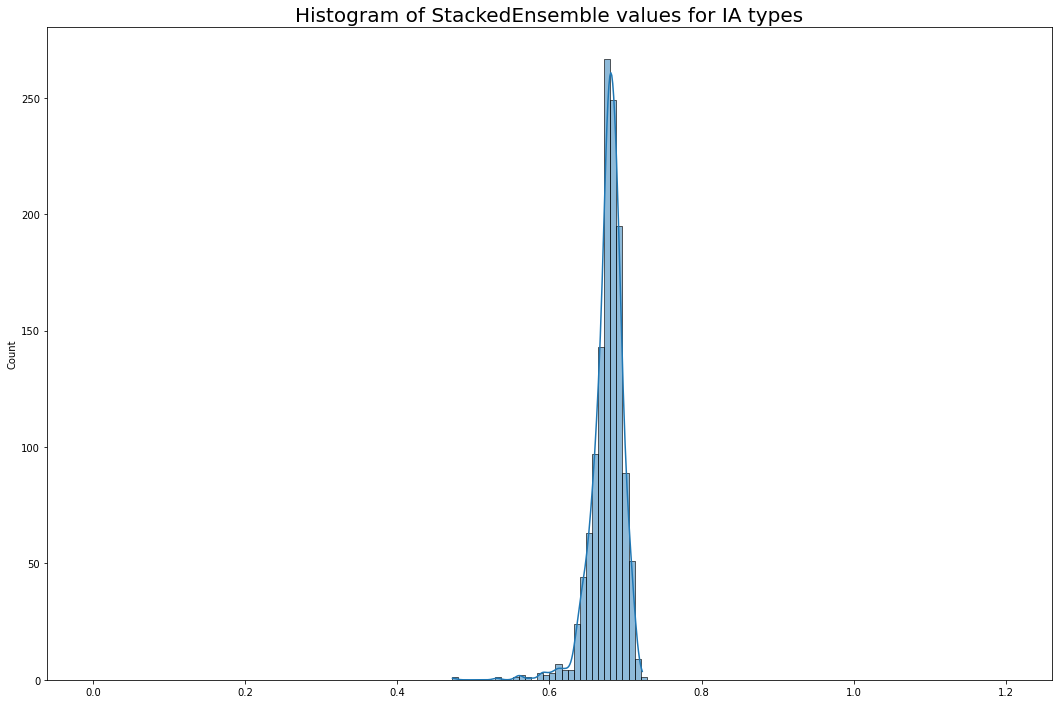

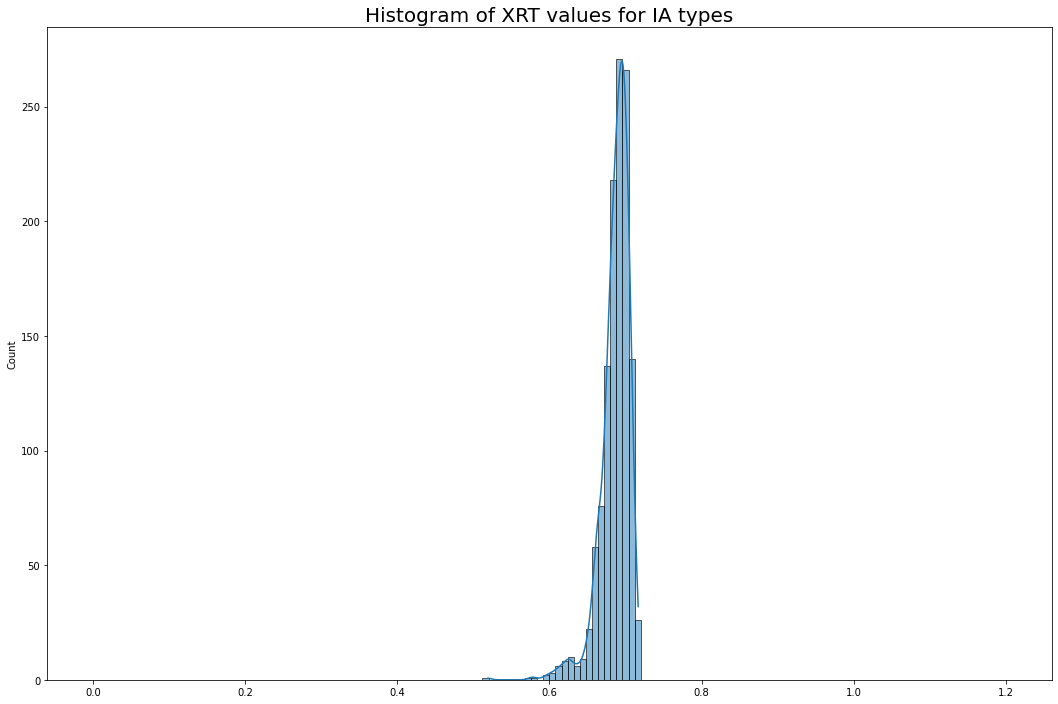

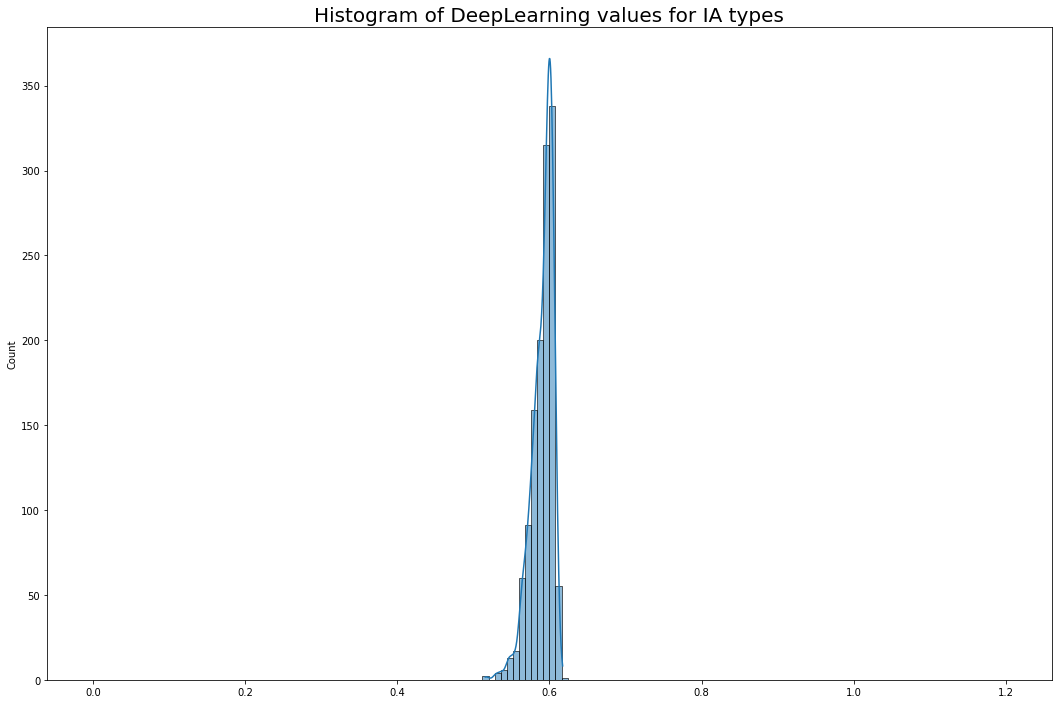

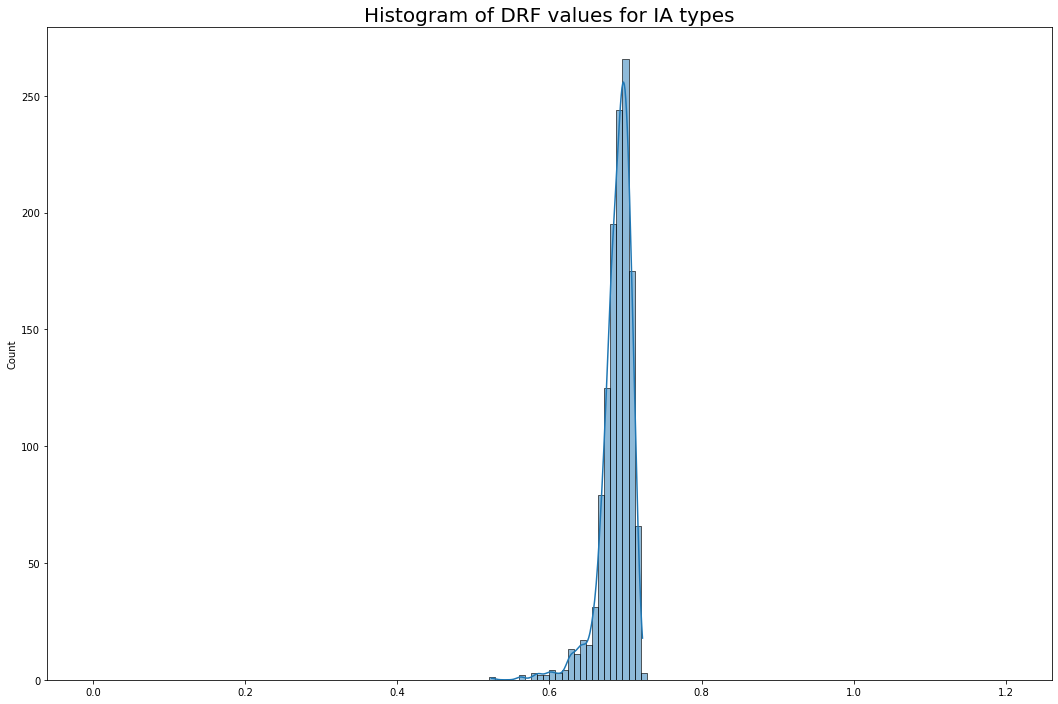

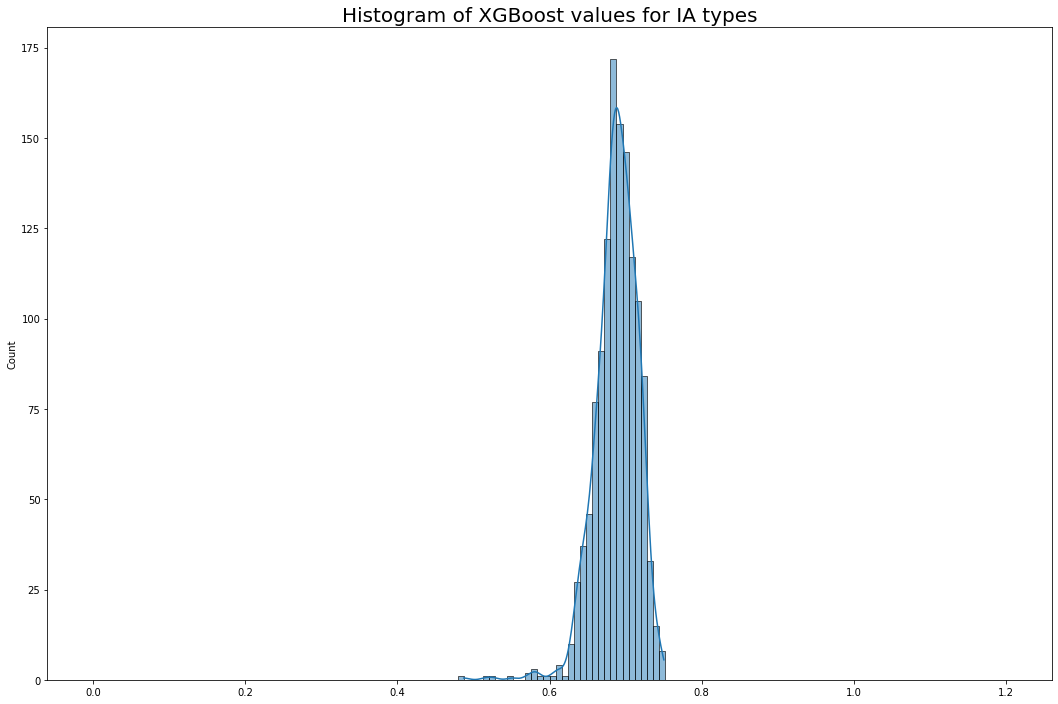

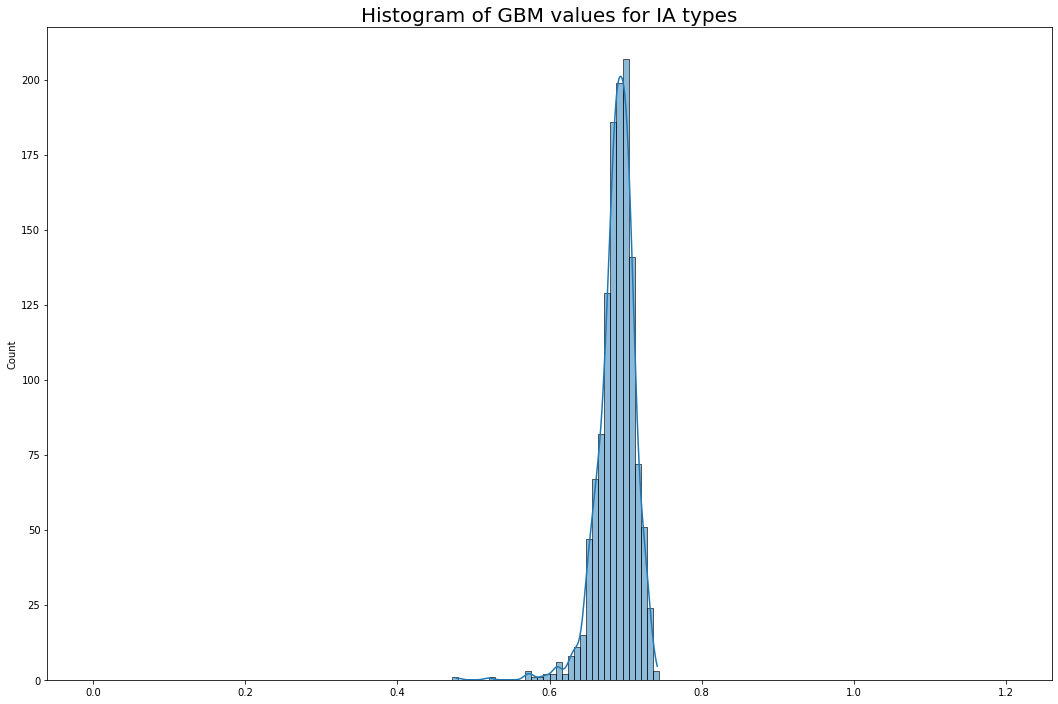

In [111]:
import seaborn as sns


for key, val in BEST_MODELS.items():
    plt.figure(figsize=(18,12))
    name = key

    hist = sns.histplot(df_predictions_higher_half[[val]].values,
                        binrange=[0,1.2],
                        bins = 150, kde=True)
    hist.legend([],[], frameon=False)
    hist.set_title(f"Histogram of {key} values for IA types",fontsize=20)

    fig = hist.get_figure()
    fig.savefig(f"{key}.pdf")
    plt.pause(0.1)
    plt.close()


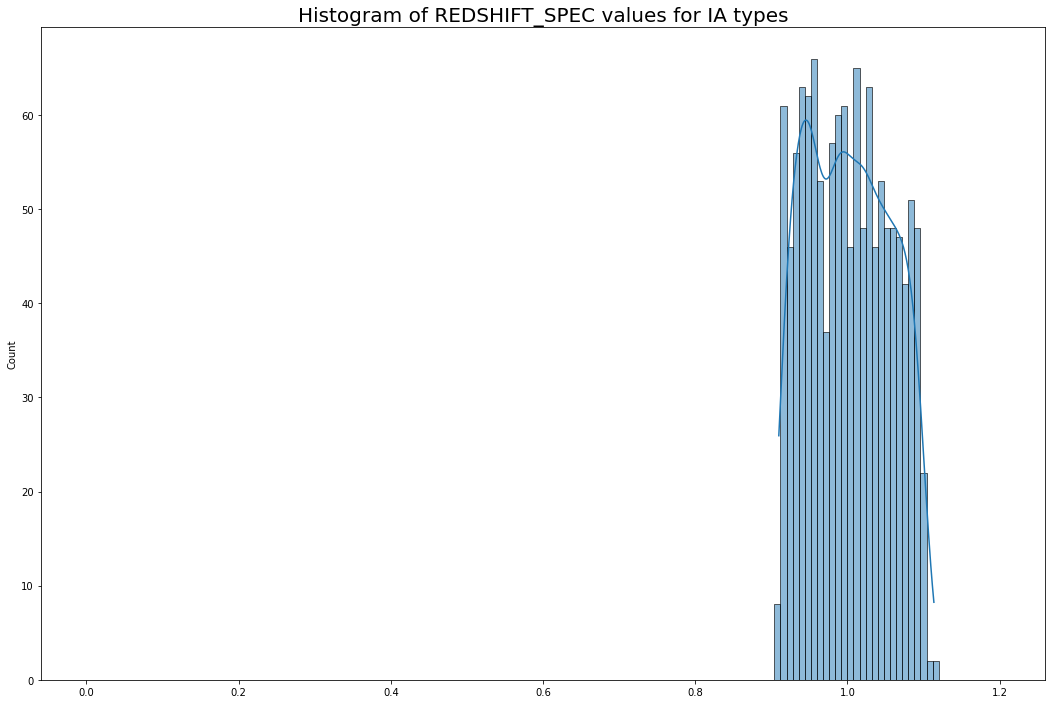

In [113]:
plt.figure(figsize=(18,12))
name = "REDSHIFT_SPEC"
hist = sns.histplot(df_predictions_higher_half[[name]].values,
                    binrange=[0,1.2],
                    bins = 150, kde=True)
hist.legend([],[], frameon=False)
hist.set_title(f"Histogram of {name} values for IA types",fontsize=20)
fig = hist.get_figure()
fig.savefig(f"{name}.pdf")


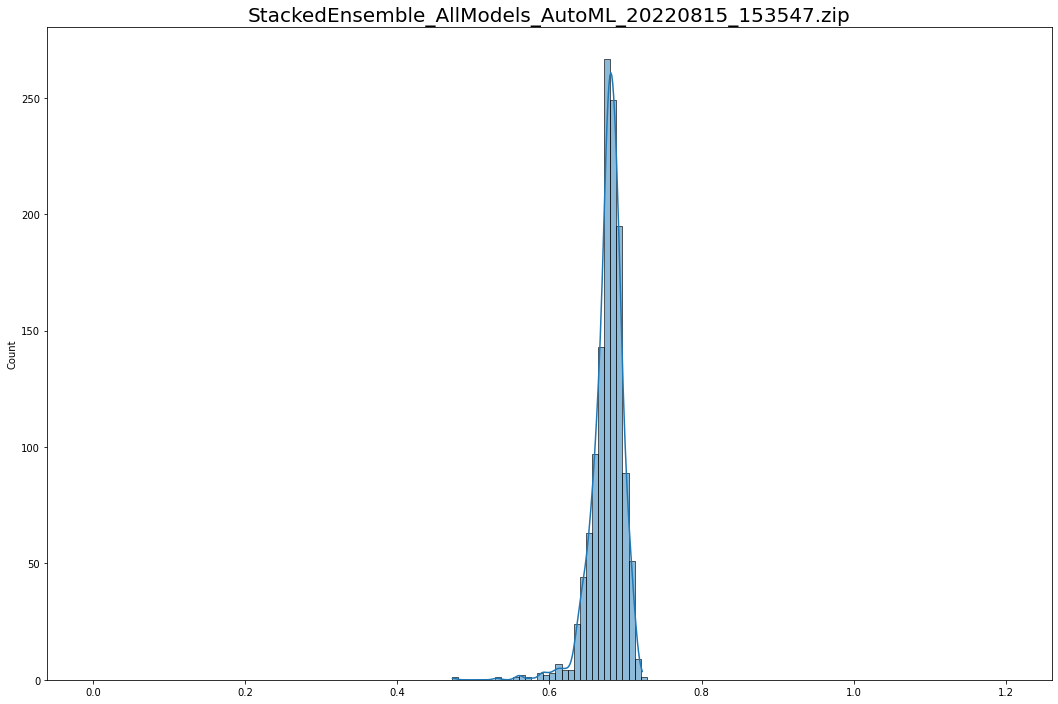

In [95]:
import seaborn as sns
plt.figure(figsize=(18,12))
col = df_hist.columns[1]

hist = sns.histplot(df_predictions_higher_half[[col]].values,
                    binrange=[0,1.2],
                    bins = 150, kde=True)
hist.legend([],[], frameon=False)
hist.set_title(col,fontsize=20)

fig = hist.get_figure()
fig.savefig(f"{col}.pdf") 

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,12))
col = df_hist.columns[1]

hist = sns.histplot(df_predictions_higher_half[[col]].values,
                    binrange=[0,1.2],
                    bins = 150, kde=True)
hist.legend([],[], frameon=False)
hist.set_title(col,fontsize=20)

fig = hist.get_figure()
fig.savefig(f"{col}.pdf") 

In [ ]:
best_model = h2o.import_mojo(f'../../models/mojo_50_ensemble/{BEST_MODEL}')
predictions = df_predictions.loc[:,df_predictions.columns[1]:df_predictions.columns[-1]].values.reshape(len(df_predictions),52)
y_best_pred = df_predictions[f'{BEST_MODEL}'].values
y_real = df_predictions['REDSHIFT_SPEC'].values

In [ ]:
for i in range(4):
    print_gaussian_kde(gen_gaussian_kde(predictions[i])[0], predictions[i], y_real[i], y_best_pred[i], df_predictions.index[i])

In [ ]:
df_kde = gen_df_gaussian_kde(df_predictions,
                             export_csv = True,
                             best_model = BEST_MODEL,
                             path = '../../data/enriched/pdf_redshift_preds.csv')

In [ ]:
df_kde

In [ ]:
len(df_kde['predictions'][0])